## Time Series on Bitcoin dataset

*Author : Ayesha Khatib*

#### Import packages

### Overview :

- Time series is different from more traditional classification and regression predictive modeling problems.
- When I see a dataset, from a data science persepective I look for patterns and the impact target variable has due to independent variables from the observed values, but with Time-Series there is an additional dimension to the observations which is by the addition of a trend, seasonality, and other time-dependent features.
- In this Notebook, I have tried to demonstrate Unserdtand your series data, how to identify stationary and non-stationary time-series using line-plot, how to check summary statistics like mean,variance over varition in time, how to perform statistical tests and lastly how to make a prediction.

*So, lets get started.*

### For understanding thr Time-Series, I will be describing the whole process in the following steps as there are many concepts in each step.

*Pre-processing : At an initial stage, I have a clean dataset ready to be read and used further for my Time-series analysis.*
    
1. Visualize the time-series : Describe your data and performing some EDA.
2. Stationarize the time-series : Here, we make our data trend stationary.
3. Plot ACF/PACF charts and find optimal parameters.
4. Build the ARIMA model
5. Make predictions

### Import packages

In [921]:
import datetime
import numpy as np
import pandas as pd
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import dateutil.parser as dparser
from statsmodels.tsa.stattools import adfuller # for dicky fuller test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf,pacf 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import ARMA
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import r2_score


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Data-Preprocessing

#### I will be only considering Bitcoin data for last 5 years from 2013 to 2018.

In [922]:
# Read the csv file 
#bitcoin_df = pd.read_csv('./bitcoin_data/btc_all_from2013.csv')
bitcoin_df = pd.read_csv('./btc_daily_usd.csv')
bitcoin_df.shape # (2650,4)

(1693, 5)

In [923]:
bitcoin_df.drop(['Unnamed: 0'],axis=1,inplace=True)
#bitcoin_df.drop(['Unnamed: 5'],axis=1,inplace=True)
bitcoin_df.head()

,Date,Close,Market_Cap,Volume
0,2018-11-18,5558.554483,2.106389e+06,378.945507
1,2018-11-17,5493.911578,2.446166e+06,445.250283
2,2018-11-16,5556.090945,3.652887e+06,657.456297
3,2018-11-15,5607.531189,6.854693e+06,1222.408391
4,2018-11-14,5665.002240,6.870521e+06,1212.801094


In [924]:
bitcoin_df.columns

Index(['Date', 'Close', 'Market_Cap', 'Volume'], dtype='object')

In [925]:
bitcoin_df.dtypes

Date           object
Close         float64
Market_Cap    float64
Volume        float64
dtype: object

In [926]:
bitcoin_df.isnull().sum()

Date          0
Close         0
Market_Cap    0
Volume        0
dtype: int64

In [927]:
#bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

In [928]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day']= df.Date.dt.day
    df['Quater'] = df.Date.dt.quarter
    df['QTR'] = pd.PeriodIndex(pd.to_datetime(df['Date']),freq='Q')

    return df

bitcoin_df = split_date(bitcoin_df)

In [929]:
bitcoin_df.head()

,Date,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
0,2018-11-18,5558.554483,2.106389e+06,378.945507,2018,11,18,4,2018Q4
1,2018-11-17,5493.911578,2.446166e+06,445.250283,2018,11,17,4,2018Q4
2,2018-11-16,5556.090945,3.652887e+06,657.456297,2018,11,16,4,2018Q4
3,2018-11-15,5607.531189,6.854693e+06,1222.408391,2018,11,15,4,2018Q4
4,2018-11-14,5665.002240,6.870521e+06,1212.801094,2018,11,14,4,2018Q4


In [930]:
bitcoin_df.shape

(1693, 9)

##  1. Visualize the time-series :
### Describe the data -- Exploratory Data Analysis (EDA)

In [931]:
print ('Bitcoin Means:', bitcoin_df['Close'].mean())

Bitcoin Means: 2706.281431963727


#### Indexing with Time Series Data

In [932]:
# Adding another column for time-series.
bitcoin_df.set_index('Date', inplace=True)

#### Max and Min Date

In [933]:
print("---------------------------------------------------")
print("The Time-Series analysis start date is :",bitcoin_df.index[0])
print()
print("The Time-Series analysis end date is :",bitcoin_df.index[1692])

print("---------------------------------------------------")

---------------------------------------------------
The Time-Series analysis start date is : 2018-11-18 00:00:00

The Time-Series analysis end date is : 2014-04-01 00:00:00
---------------------------------------------------


#### Plot the Bitcoin price over the years

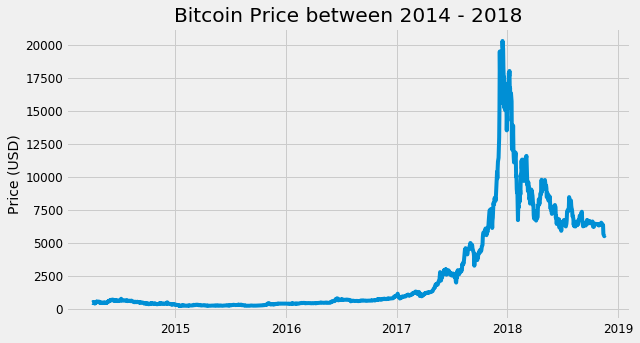

In [934]:
def plot_btc(df,colname='Close'):
    plt.figure(figsize=(9,5))
    plt.plot(df.index, df[colname])
    plt.title('Bitcoin Price between 2014 - 2018')
    plt.ylabel('Price (USD)')
    plt.grid(b=True)
    plt.show()

#plot bitcoin price movement over the years
plot_btc(bitcoin_df)

#### Plot the Bitcoin Volume transactions over the years

Text(0, 0.5, 'Bitcoin Volumes transactions per day')

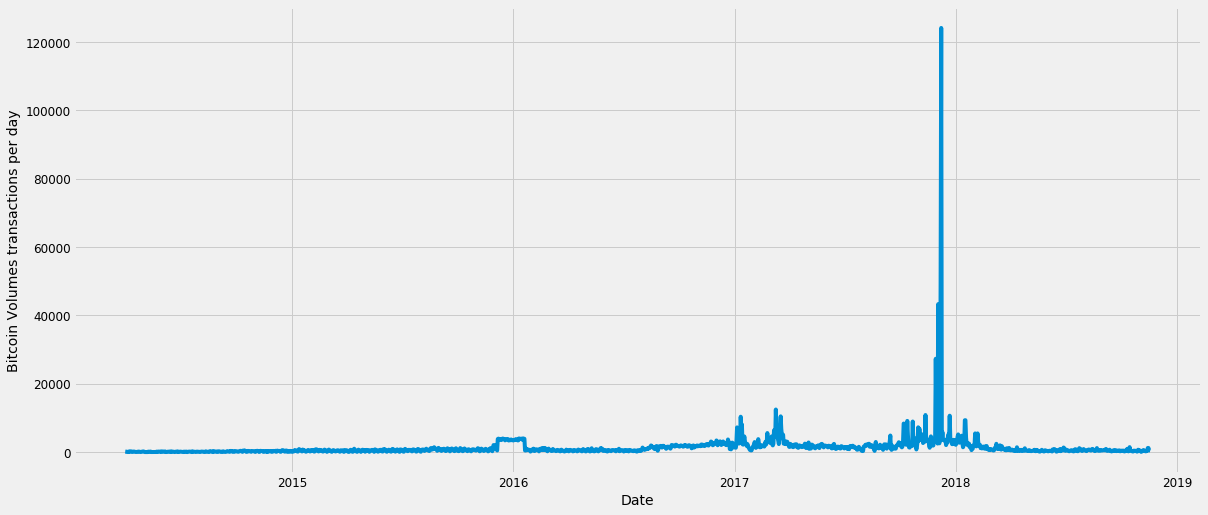

In [935]:
ax = bitcoin_df['Volume'].plot()
ax.set_ylabel('Bitcoin Volumes transactions per day')

#### Plot the Bitcoin Market Capacity over the years

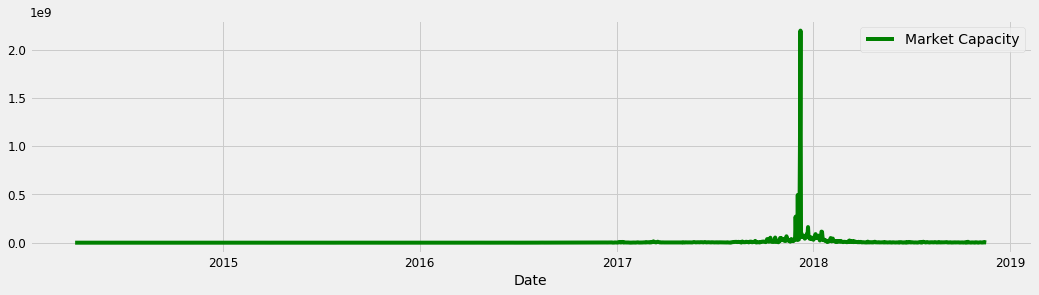

In [936]:
# Market Capacity of plotting.
time_btc = pd.Series(data=bitcoin_df['Market_Cap'].values,index=bitcoin_df.index)
time_btc.plot(figsize=(16, 4), label="Market Capacity", legend=True,color='g')
plt.show()

In [937]:
bitcoin_df.columns

Index(['Close', 'Market_Cap', 'Volume', 'Year', 'Month', 'Day', 'Quater',
       'QTR'],
      dtype='object')

In [938]:
bitcoin_df.dtypes

Close         float64
Market_Cap    float64
Volume        float64
Year            int64
Month           int64
Day             int64
Quater          int64
QTR            object
dtype: object

### Plotting Quater

In [939]:
#Year 2014 - Year 2018 = 5 years in total

quater = pd.DataFrame()
quater = bitcoin_df[(bitcoin_df['Year'] == 2018)]

In [940]:
quater.head()

,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2018-11-18,5558.554483,2.106389e+06,378.945507,2018,11,18,4,2018Q4
2018-11-17,5493.911578,2.446166e+06,445.250283,2018,11,17,4,2018Q4
2018-11-16,5556.090945,3.652887e+06,657.456297,2018,11,16,4,2018Q4
2018-11-15,5607.531189,6.854693e+06,1222.408391,2018,11,15,4,2018Q4
2018-11-14,5665.002240,6.870521e+06,1212.801094,2018,11,14,4,2018Q4


In [941]:
#Year 2014 - Year 2018 = 5 years in total

quater1 = pd.DataFrame()
quater1 = bitcoin_df[(bitcoin_df['Year'] == 2017)]

In [942]:
quater1.head()

,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2017-12-31,14612.799982,3.491536e+07,2389.368186,2017,12,31,4,2017Q4
2017-12-30,13506.995353,4.671744e+07,3458.758692,2017,12,30,4,2017Q4
2017-12-29,15393.893101,3.721477e+07,2417.501935,2017,12,29,4,2017Q4
2017-12-28,15380.880643,5.525249e+07,3592.283834,2017,12,28,4,2017Q4
2017-12-27,16857.214374,4.594128e+07,2725.318456,2017,12,27,4,2017Q4


In [943]:
#Year 2014 - Year 2018 = 5 years in total

quater2 = pd.DataFrame()
quater2 = bitcoin_df[(bitcoin_df['Year'] == 2016)]

In [944]:
quater2.head()

,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2016-12-31,973.769520,1.323300e+06,1358.945484,2016,12,31,4,2016Q4
2016-12-30,976.318606,1.712618e+06,1754.159294,2016,12,30,4,2016Q4
2016-12-29,978.029376,2.564884e+06,2622.501600,2016,12,29,4,2016Q4
2016-12-28,972.980003,2.703337e+06,2778.409210,2016,12,28,4,2016Q4
2016-12-27,942.391183,1.064850e+06,1129.944958,2016,12,27,4,2016Q4


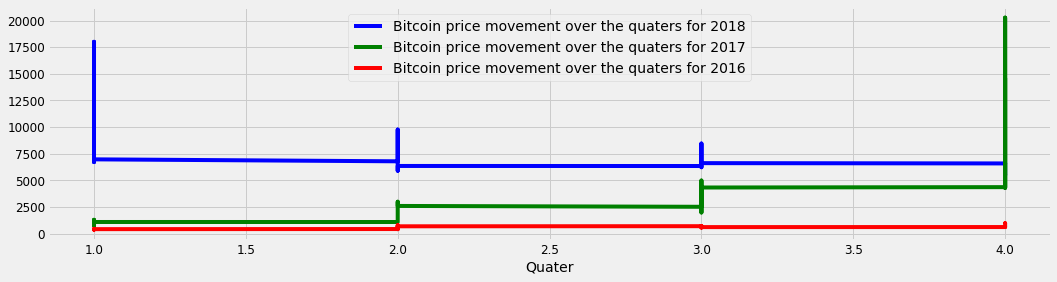

In [945]:
# Bitcoin price movement over the Quater for 2018 and 2017 (Layered Time-series)

quater_btc = pd.Series(data=quater['Close'].values,index=quater['Quater'])
quater_btc.plot(figsize=(16, 4), label="Bitcoin price movement over the quaters for 2018", legend=True,color='b')

quater1_btc = pd.Series(data=quater1['Close'].values,index=quater1['Quater'])
quater1_btc.plot(figsize=(16, 4), label="Bitcoin price movement over the quaters for 2017", legend=True,color='g')

quater2_btc = pd.Series(data=quater2['Close'].values,index=quater2['Quater'])
quater2_btc.plot(figsize=(16, 4), label="Bitcoin price movement over the quaters for 2016", legend=True,color='r')

plt.show()

## Defining the Target variable.

#### For Time-Series analysis the Target variable to be predict is the Bitcoin price which in my case is the "Closing price"

In [946]:
y = bitcoin_df['Close']

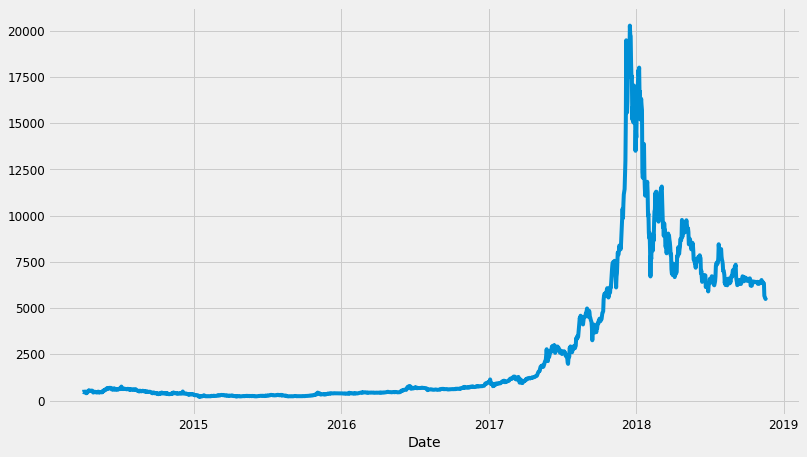

In [947]:
y.plot(figsize=(12,7))

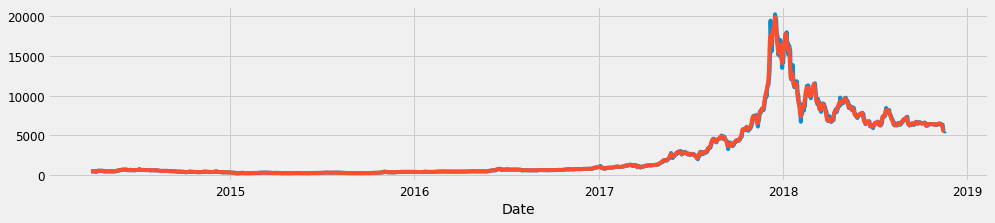

In [948]:
# window :: This is the number of observations used for calculating the statistic. Each window will be a fixed size.

bitcoin_df.Close.plot(figsize=(20,5))
bitcoin_df.Close.rolling(window=3).mean().plot(figsize=(15,3))

## 2. Stationarize the time-series : 

- *Defination : Stationarity is important because in its absence a model describing the data will vary in accuracy at different time points. As such, stationarity is required for sample statistics such as means, variances, and correlations to accurately describe the data at all time points of interest.*

- The observations in a stationary time series are not dependent on time i.e. time series are stationary if they do not have trend or seasonal effects. 

- Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.


### Is the series Stationary ?
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

1. Visual Inspection : By looking at the plots review the time series plot of your data and visually check if there are any obvious trends or seasonality.
2. Summary Statistics: Review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
3. Statistical Tests: It is to check if the expectations of stationarity are met or have been violated.

### Visualize the decomposition of data

### Time Series components :
1. Trend ---> Long term
2. Seasonlity ---> Term(long-term which is periodic)
3. Cyclic(long-term)
4. Residual ---> Noise

#### No method applied, plotting the original dataset.

<Figure size 1296x576 with 0 Axes>

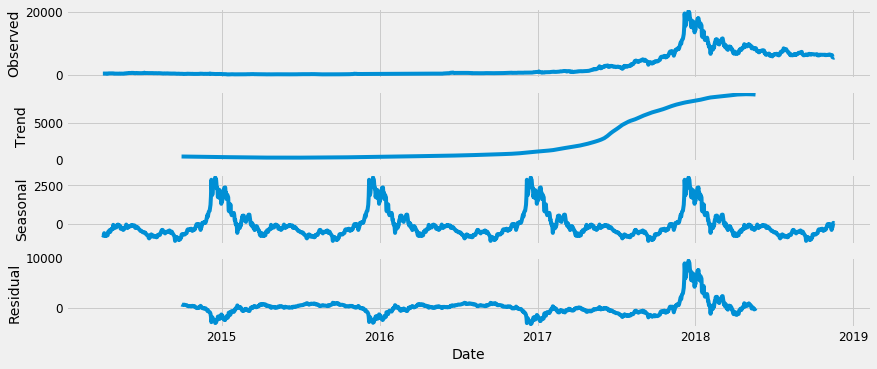

In [950]:
ts_decomp=seasonal_decompose(y,freq=365)

fig = plt.figure()  
fig = ts_decomp.plot()  
fig.set_size_inches(12,5)

### Plot just the seasonal component

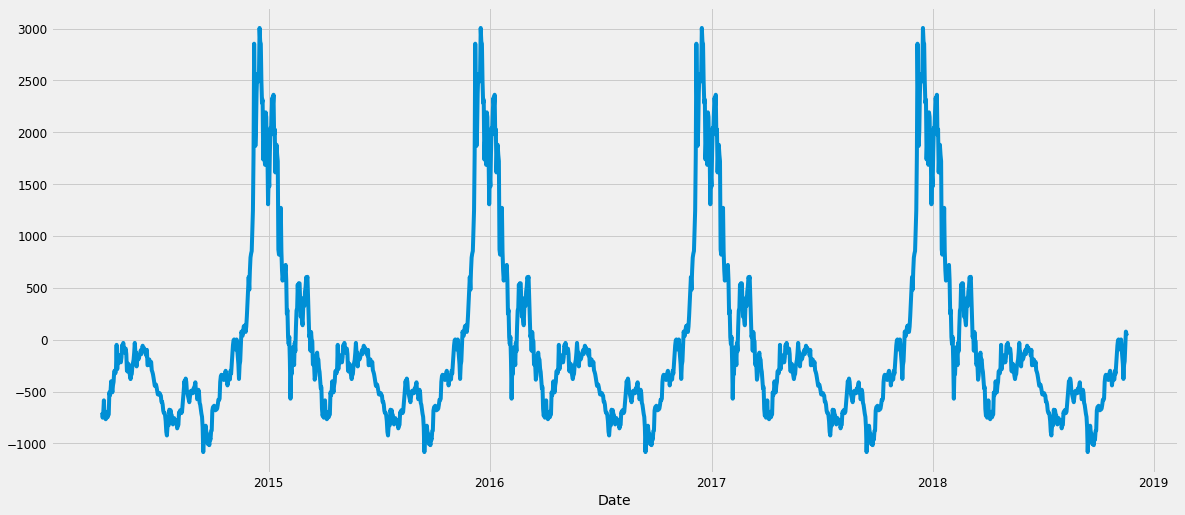

In [951]:
# grab just one graphic doing the following:
seasonal = ts_decomp.seasonal 
seasonal.plot()

### OBSERVATIONS :
1. Trend plot looks in year 2018 the momentum of Bitcoin trade was higest and then again reduced but no seasonal changes are observed. The trend plot is cyclic as there are obivious peaks and drops but not at the same interval. Also, difficult to say if its a positive or negative trend.
2. Seasonal plot looks very high frequency plot and no variation with time can be clearly observed.
3. Residual plot varies/fluctuates with the trend plot.

    
seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True, extrapolate_trend=0)

#### Visualize the plot individually with respect to the 'Trend' for original series data.

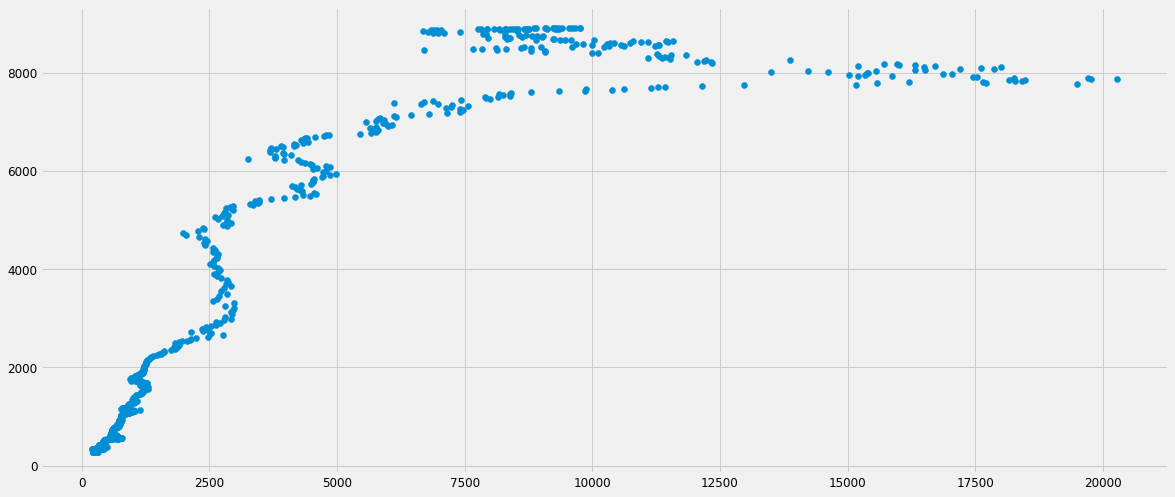

In [952]:
plt.scatter(x=y, y=ts_decomp.trend, label='Trend')

## Observation : Linear plot

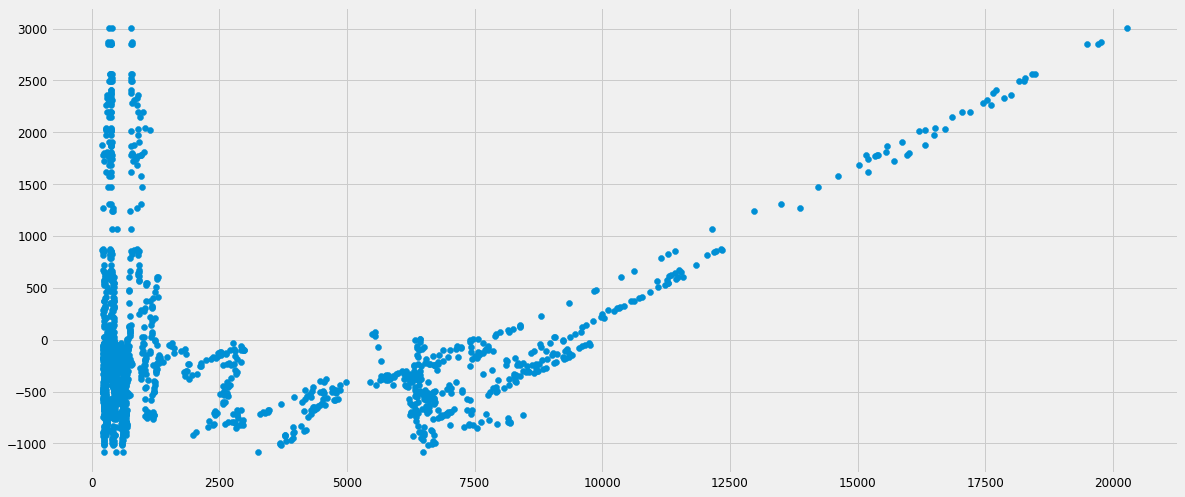

In [953]:
plt.scatter(x=y, y=ts_decomp.seasonal, label='Trend')

## Observation : Linear plot

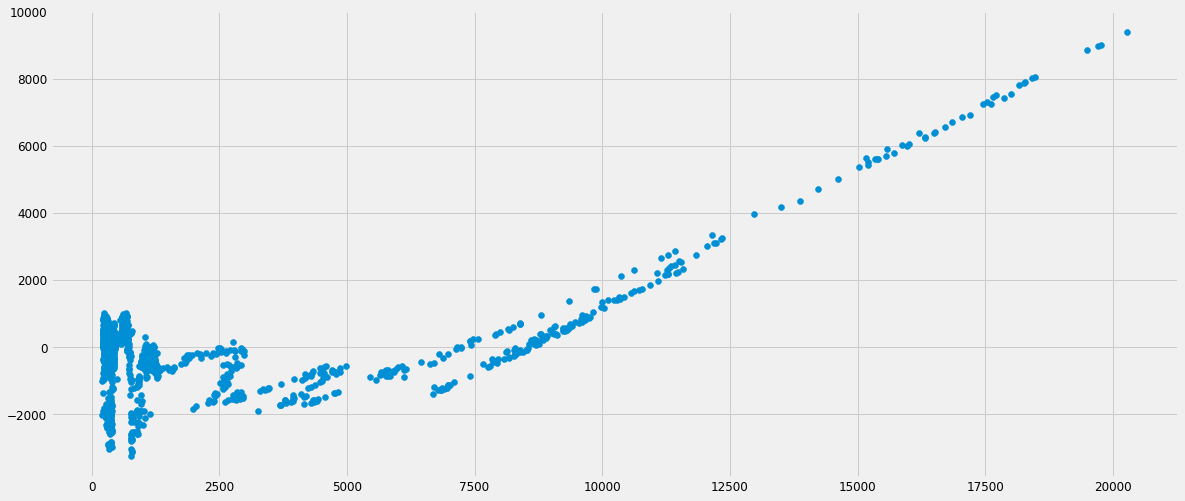

In [954]:
plt.scatter(x=y, y=ts_decomp.resid, label='Trend')

### Modelling methods : 
    - When the magnitude of the seasonal and residual are independednt of the trend then use additive.
    - When the magnitude of the seasonal and residual influence/fluctuate with trend then use multiplicative.

### Multiplicative changes :: 
The magnitude of the seasonal change increases over time as the data values increase i.e. the magnitude of the peaks and drops increases as they vary consistently or seasonally over time.

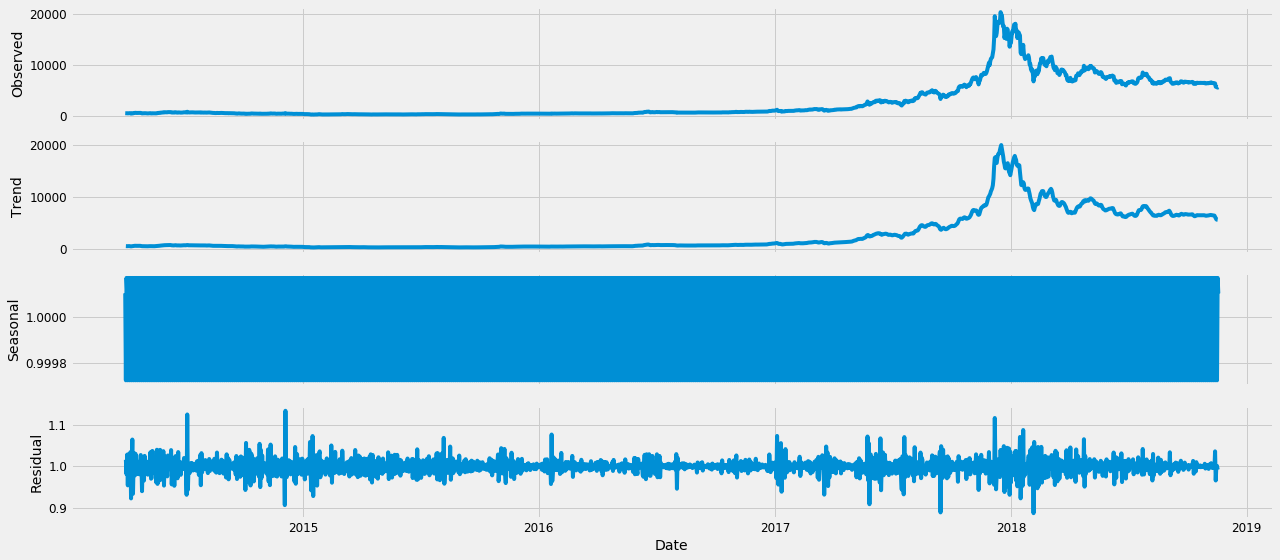

In [955]:
ts_decomp2=seasonal_decompose(y,freq=3,model='multiplicative')
ts_plot=ts_decomp2.plot()

#### Visualize the plot individually with respect to the 'Trend' for multiplitive series data.

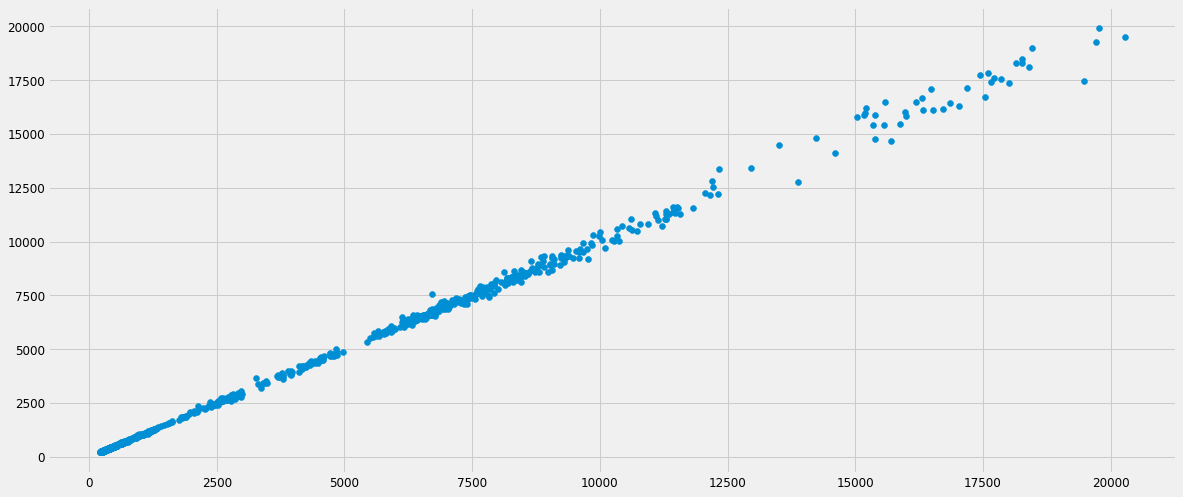

In [956]:
plt.scatter(x=y, y=ts_decomp2.trend, label='Trend')

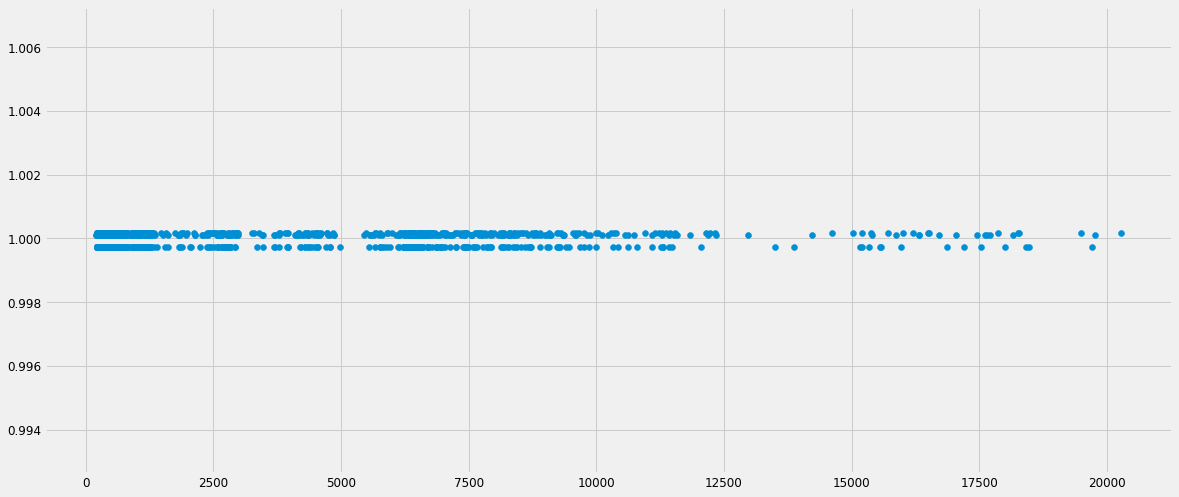

In [957]:
plt.scatter(x=y, y=ts_decomp2.seasonal, label='Trend')

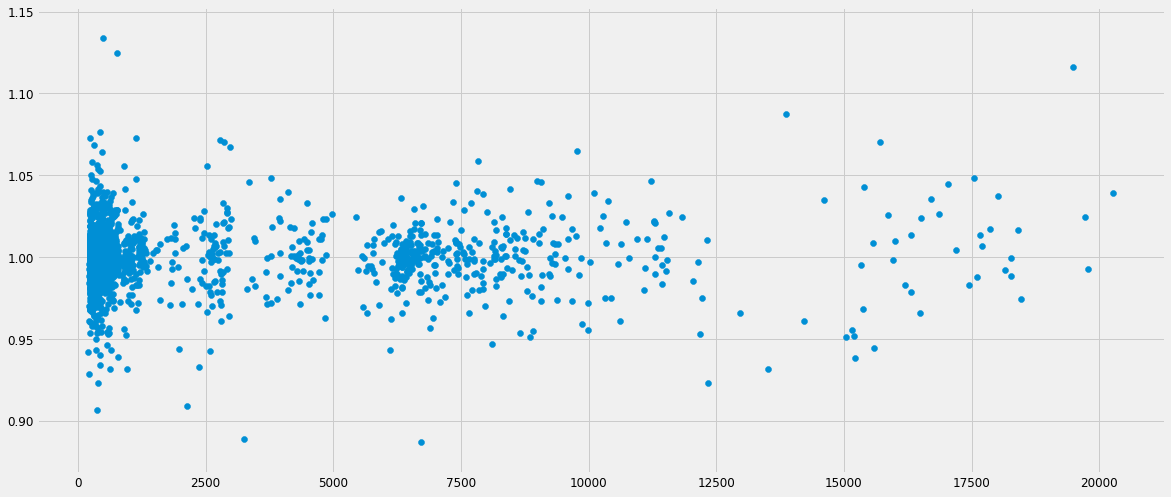

In [958]:
plt.scatter(x=y, y=ts_decomp2.resid, label='Trend')

### Additive changes ::
The data values tend to increase over time but the magnitude of the seasonal change remains the same i.e. the peaks and drops have same magnitude as they vary consistently or seasonally over time.

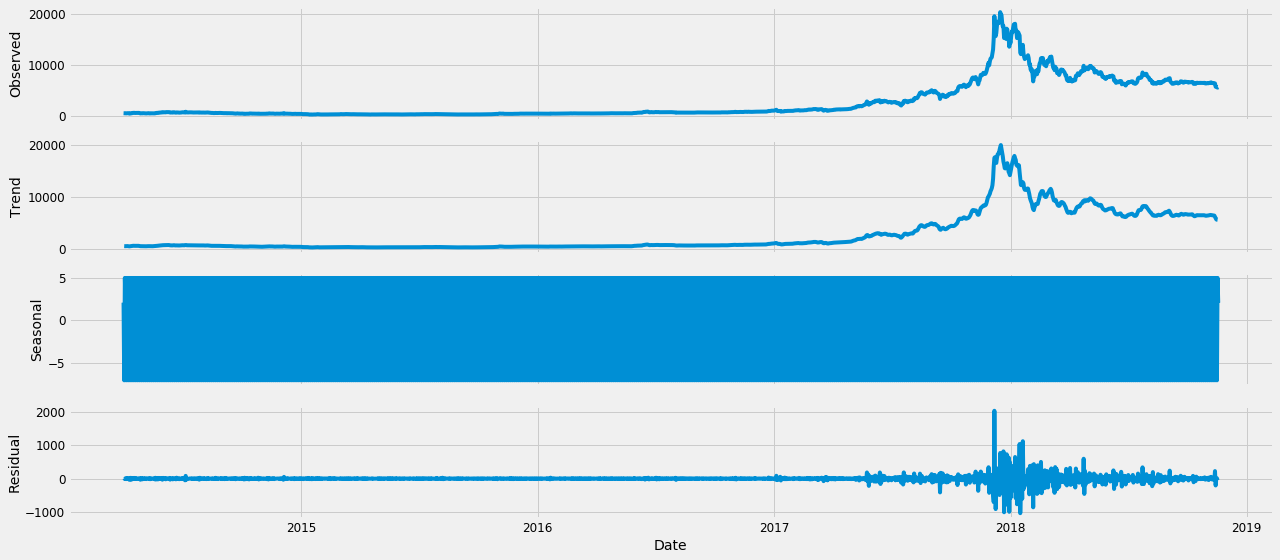

In [959]:
ts_decomp3=seasonal_decompose(y,freq=3,model='additive')
ts_plot=ts_decomp3.plot()

#### Visualize the plot individually for Additive model type.

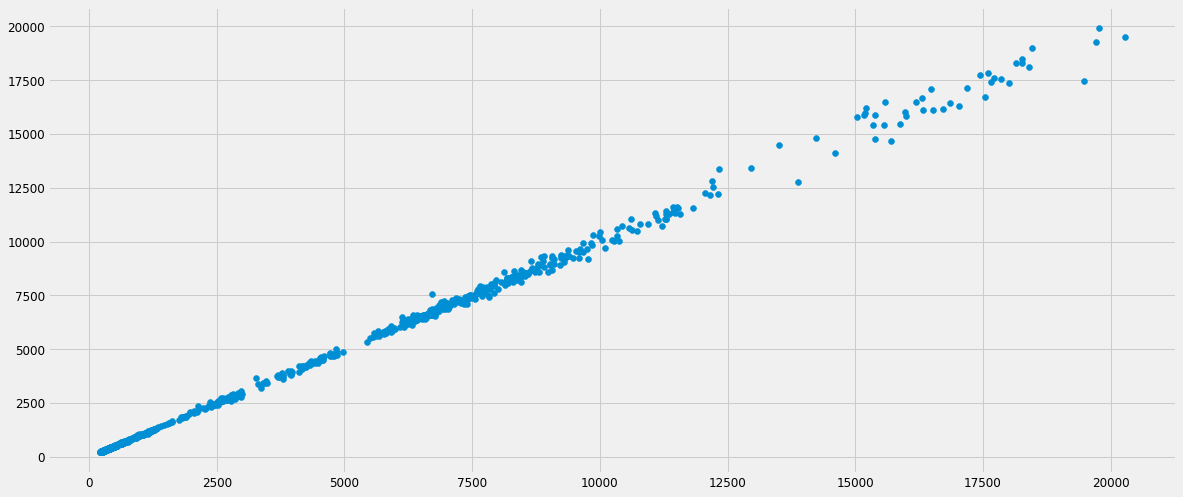

In [960]:
plt.scatter(x=y, y=ts_decomp3.trend, label='Trend')

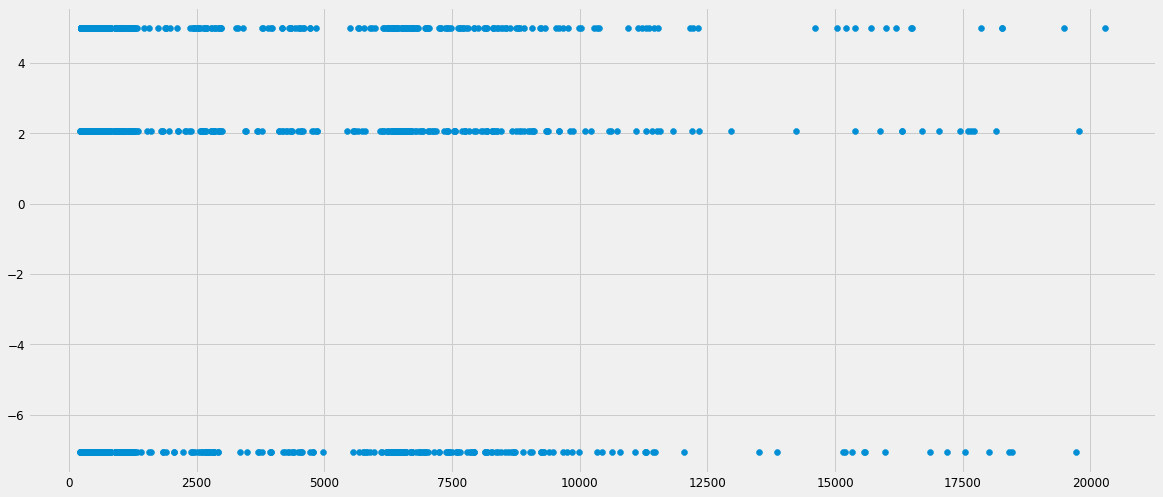

In [961]:
plt.scatter(x=y, y=ts_decomp3.seasonal, label='Trend')

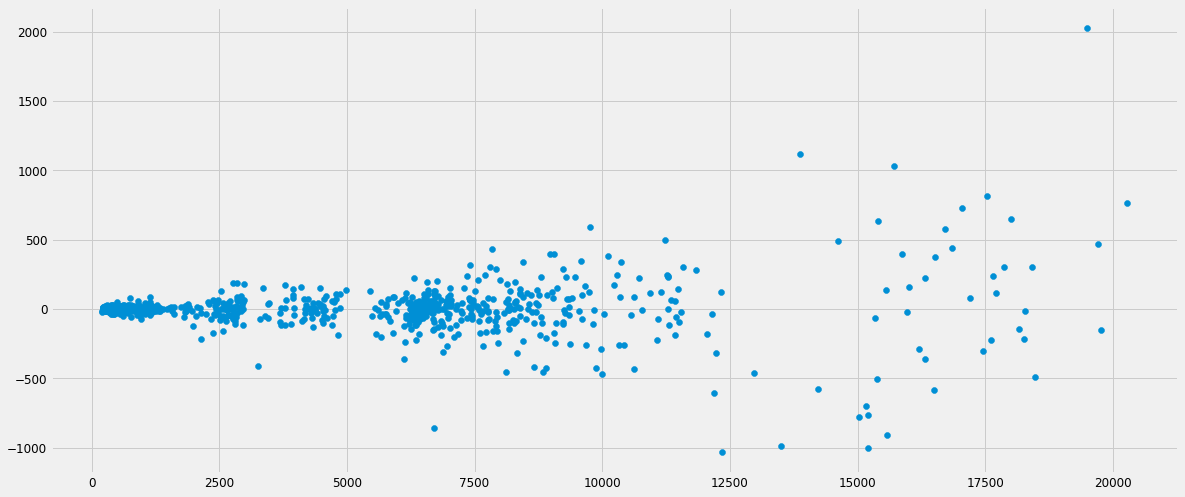

In [962]:
plt.scatter(x=y, y=ts_decomp3.resid, label='Trend')

### OBSERVATIONS on Multiplitive and Additive time-series plots.

Based on the below rules, the Bitcoin series data is Multiplicative as the Seasonal plot for no model applied and multiplicative is the same.

- If the magnitude of the seasonal changes is constant, then the seasonal changes are additive. 
- If the magnitude of the seasonal changes is greater when the data values are greater, then the seasonal changes are multiplicative. The extra variability can make multiplicative seasonal changes harder to forecast accurately

### Non Stationary to Stationarity

Make time stationary before modelling

### Stationarity test

In [963]:
# the above manipulation of stationary can be put in a function
def stationarity_test(data,window_type):
    price_rate=bitcoin_df.Close
    # rolling mean
    roll_mean=price_rate.rolling(window=window_type).mean()
    # rolling median
    roll_median=price_rate.rolling(window=window_type).median()
    # expanding
    exp=price_rate.expanding().mean()
    # exponentially weighted mean
    expo_mean=price_rate.ewm(span=10).mean()
    
    # import adf Augmented Dickey Fuller Test :: similar to t-test
    dft=adfuller(price_rate)
    dft_result=pd.Series(dft[:2], index=['T-stats','p-value'])
    print("********************************")
    print('Result of the Augmented Dickey Fuller Test')
    print(dft_result)
    print("********************************")
    
    rolling_list=(price_rate,roll_mean,roll_median,exp,expo_mean)
    label_list=('price_rate','roll_mean','roll_median','expanding','expo_mean')
    
    for u,v in zip(rolling_list,label_list):
        u.plot(label=v,figsize=(10,4), lw=3.5)
        plt.legend()

********************************
Result of the Augmented Dickey Fuller Test
T-stats   -1.907818
p-value    0.328392
dtype: float64
********************************


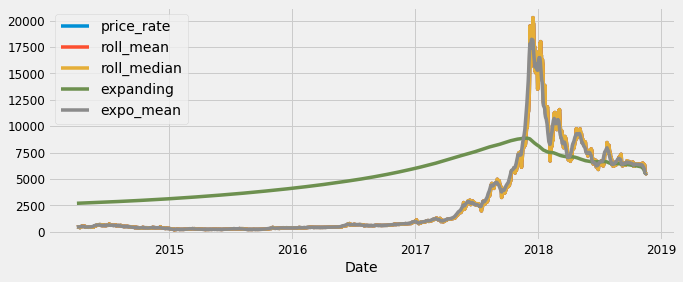

In [964]:
stationarity_test(bitcoin_df,window_type=1)

********************************
Result of the Augmented Dickey Fuller Test
T-stats   -1.907818
p-value    0.328392
dtype: float64
********************************


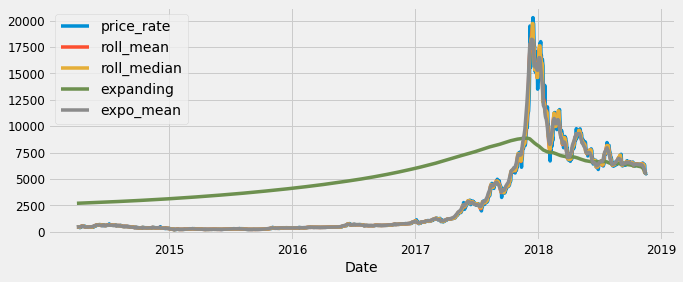

In [965]:
stationarity_test(bitcoin_df,window_type=5)

********************************
Result of the Augmented Dickey Fuller Test
T-stats   -1.907818
p-value    0.328392
dtype: float64
********************************


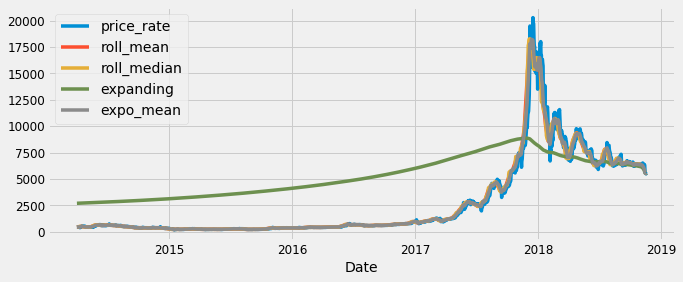

In [966]:
stationarity_test(bitcoin_df,window_type=15)

********************************
Result of the Augmented Dickey Fuller Test
T-stats   -1.907818
p-value    0.328392
dtype: float64
********************************


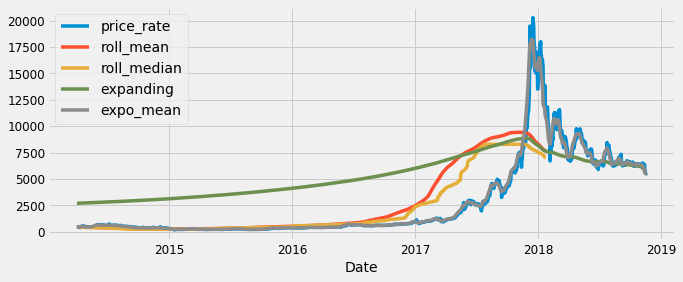

In [967]:
# detrend the time series - making it stationary

bitcoin_df_diff = bitcoin_df.Close - bitcoin_df.Close.shift()
bitcoin_df_diff

stationarity_test(bitcoin_df_diff,window_type=300)

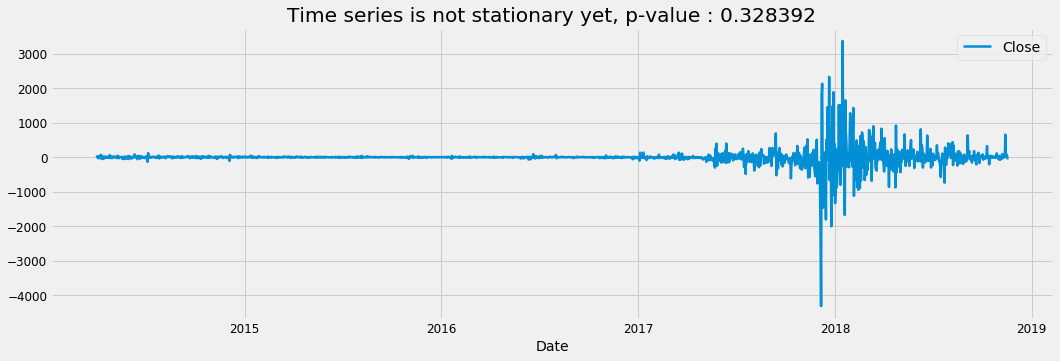

In [968]:
bitcoin_df_diff.plot(lw=2.5, figsize=(16,5))
plt.legend(loc='best')
plt.title('Time series is not stationary yet, p-value : 0.328392')
plt.show()

### OBSERVATION ::

- From the above Stationary test, the Time series is not stationary since the p-val = 0.328392
- Now, I will apply the Dickey-Fuller Test.

Based on the reference ::
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

### Dickey–Fuller tests the null hypothesis

In [969]:
def stationarity_test2(df,window_type):
    #rate=data.Close
    # rolling mean
    roll_mean=df.rolling(window=window_type,center=False).mean()
    # rolling median
    roll_med=df.rolling(window=window_type,center=False).median()
    # rolling std dev
    roll_std=df.rolling(window=window_type,center=False).std()
    # expanding
    #em=rate.expanding().mean()
    # exponentially weighted mean
    #ewm=rate.ewm(span=10).mean()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std Dev')
    median = plt.plot(roll_med, color='green', label='Rolling Median')
    plt.legend(loc='best')
    plt.title('Rolling Mean, Median & Standard Deviation')
    plt.show()
    
    # diff the time series
    df_diff=df-df.shift()

    # Dickey Fuller Test on diff time series
    df_diff=df_diff.dropna() # not use inplace as it would change
    dft2=adfuller(df_diff)
    dft_result2=pd.Series(dft2[:2], index=['T-stats','p-value'])
    print("********************************")
    print('Results of Dickey-Fuller Test:')
    print(dft_result2)
    print("********************************")

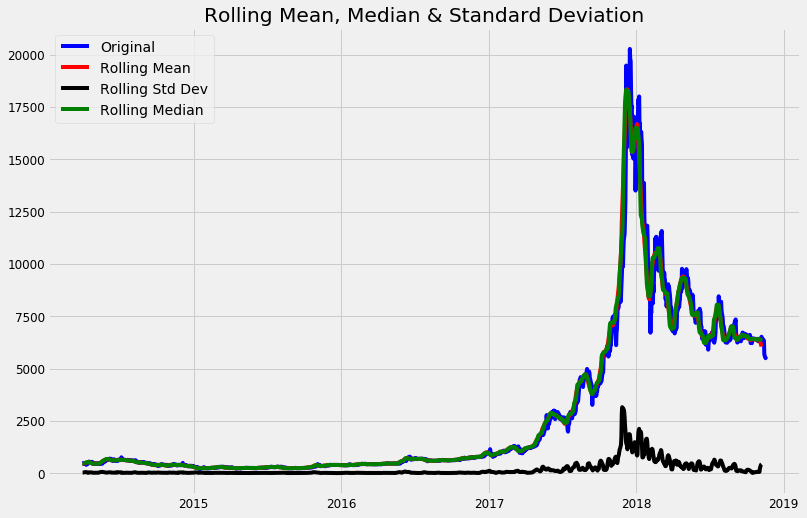

********************************
Results of Dickey-Fuller Test:
T-stats   -7.680805e+00
p-value    1.505766e-11
dtype: float64
********************************


In [970]:
stationarity_test2(bitcoin_df.Close,window_type=12)

#### OBSERVATIONS ::

- Time series is stationary now as the p-value is 1.505766e-11 which is p-val <= 0.05.

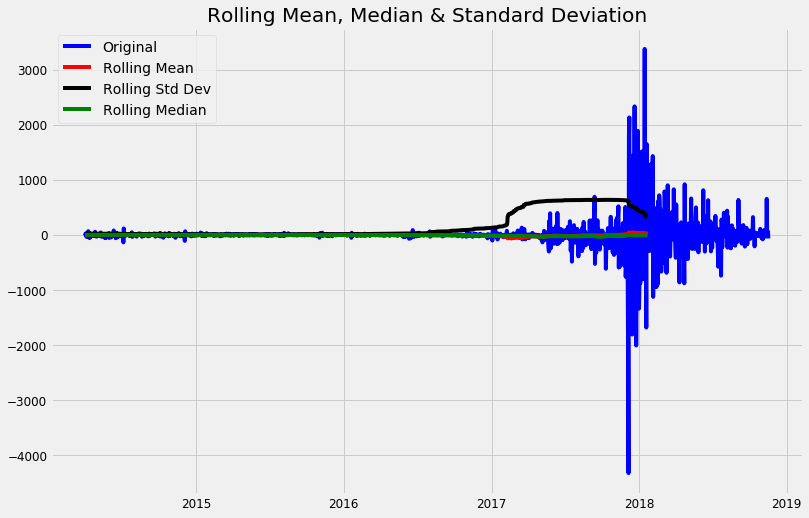

********************************
Results of Dickey-Fuller Test:
T-stats   -1.406919e+01
p-value    2.961150e-26
dtype: float64
********************************


In [971]:
# detrend the time series - making it stationary

bitcoin_df_diff2 = bitcoin_df.Close - bitcoin_df.Close.shift()
#bitcoin_df_diff2

stationarity_test2(bitcoin_df_diff2,window_type=300)

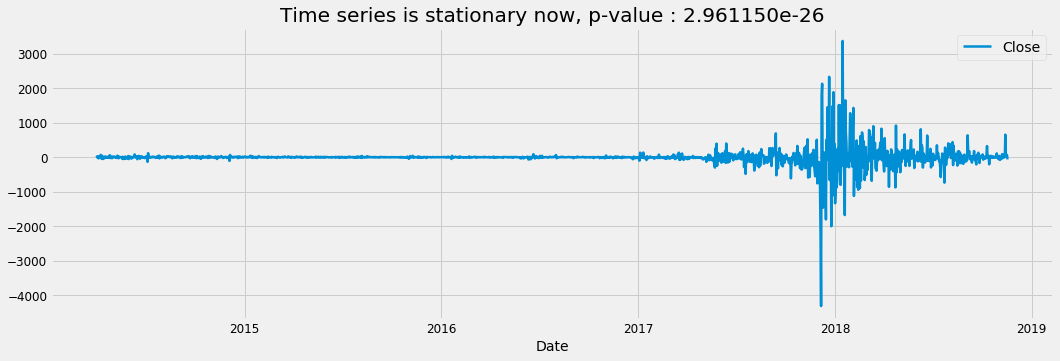

In [972]:
bitcoin_df_diff2.plot(lw=2.5, figsize=(16,5))
plt.legend(loc='best')
plt.title('Time series is stationary now, p-value : 2.961150e-26')
plt.show()

### 3. Plot ACF/PACF charts and find optimal parameters.

Create autocorrelation and partial autocorrelation plots

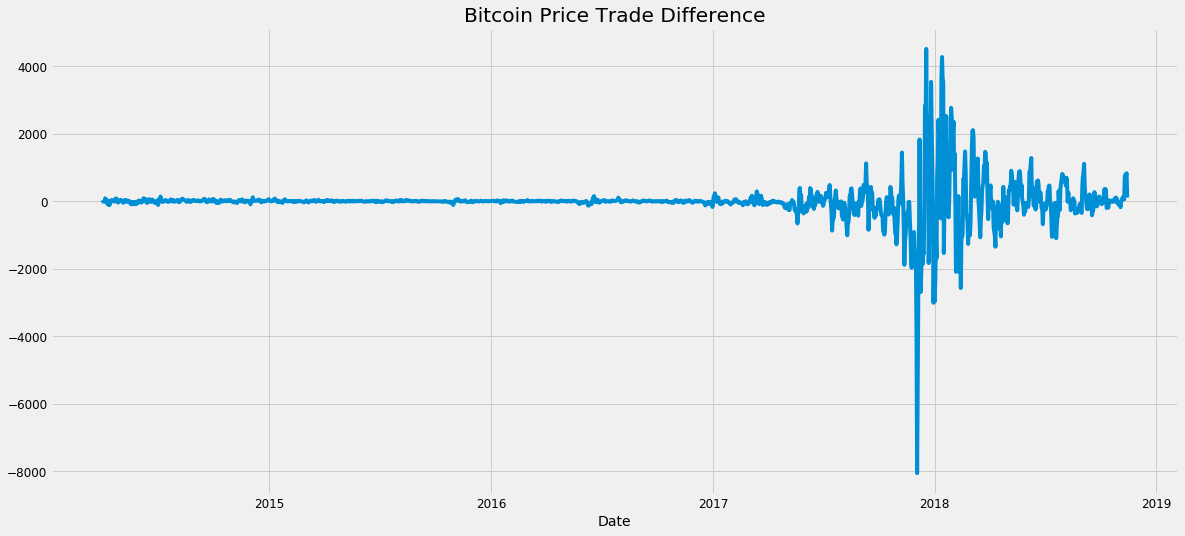

In [973]:
# regular diff
diff0 = y.diff(periods=4)[4:]
diff0.plot(title='Bitcoin Price Trade Difference')

Two important components for Time series modelling
1. Autocorrelation, ACF
2. Partial Autocorrelation, PACF

#### Autocorrelation and the autocorrelation function (ACF)
- Autocorrelation is a measure of how correlated a variable is with itself.
- Autocorrelation measures how closely related earlier values are with values occurring later in time.

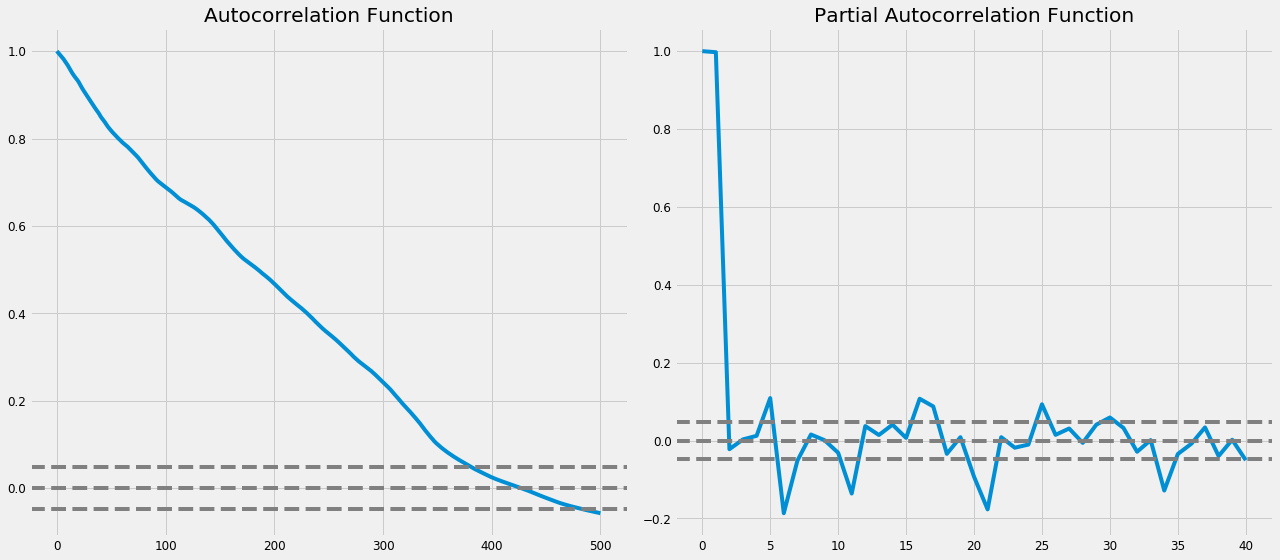

In [974]:
# option 2

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(bitcoin_df.Close, nlags=500)
lag_pacf = pacf(bitcoin_df.Close, nlags=40, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bitcoin_df.Close)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bitcoin_df.Close)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bitcoin_df.Close)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bitcoin_df.Close)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

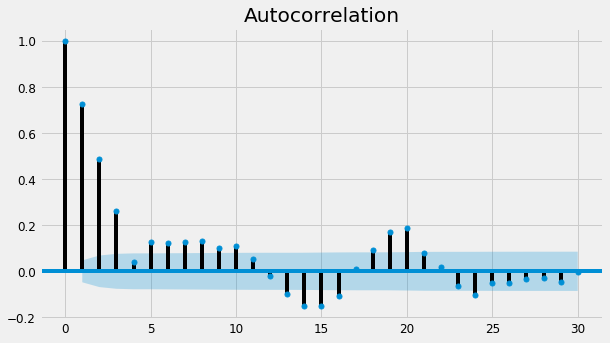

In [975]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(diff0, lags=30, ax=ax)
plt.show()

#### Partial autocorrelation and the partial autocorrelation function (PACF)
- This is similar to the autocorrelation, but instead of just the correlation at increasing lags, it is the correlation at a given lag controlling for the effect of previous lags.

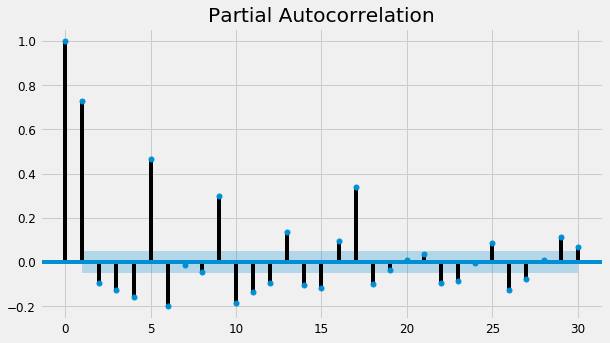

In [976]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(diff0, lags=30, ax=ax)
plt.show()

### Take a second-order difference of the Bitcoin Price timeseries

Plot the ACF and PACF again with the second-order differenced series.

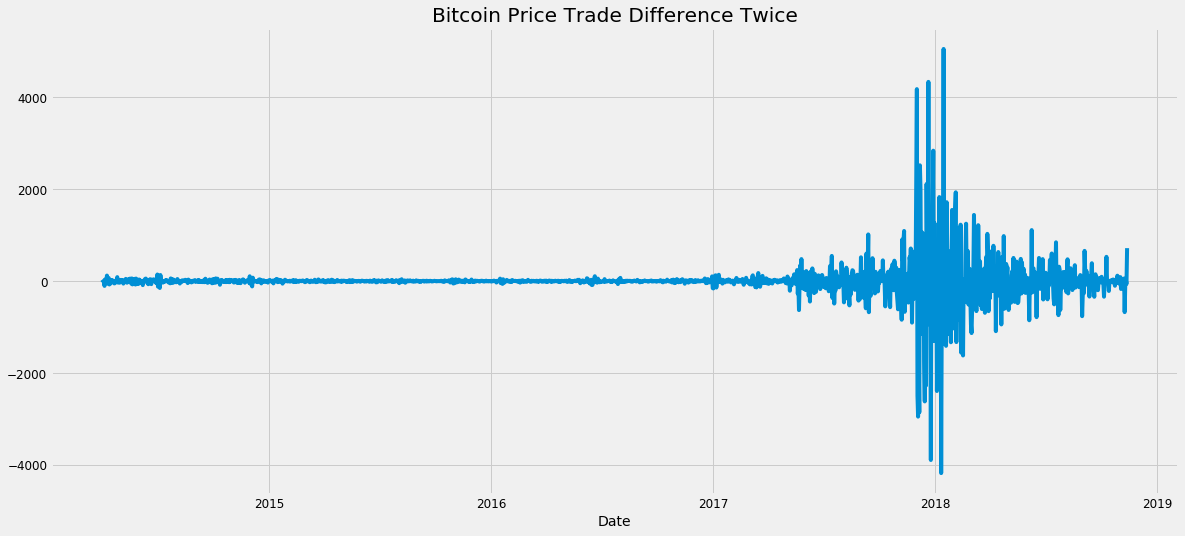

In [977]:
# additional diff
diff1 = diff0.diff()[1:]
diff1.plot(title='Bitcoin Price Trade Difference Twice')

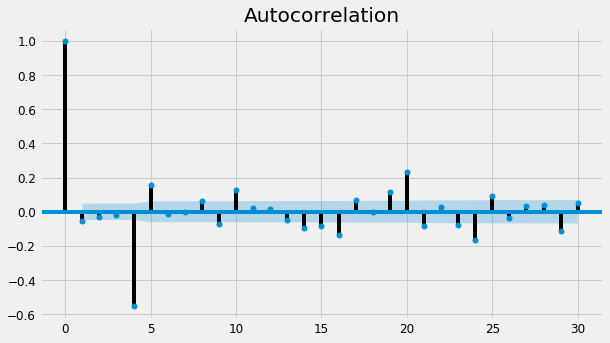

In [978]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(diff1, lags=30, ax=ax)
plt.show()

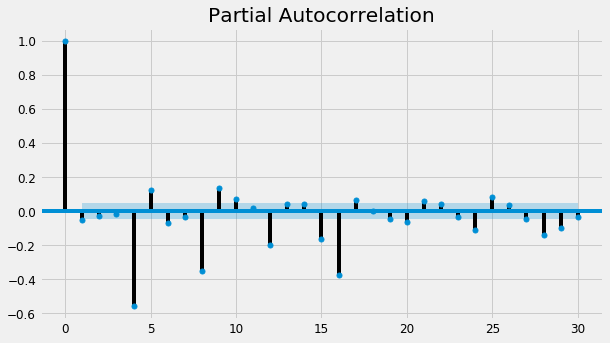

In [979]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(diff1, lags=30, ax=ax)
plt.show()

### Interpretation of the ACF
1. The blue region represnts the confidence interval and the values inside it are insignificant statistically.
2. The stem represents the lagged correlation values.
3. Values outside of blue region are statistically significant.
4. With acf and pacf, we are trying the best predictors/features.
5. autocorr it correlates each one to previous.

In [980]:
# Lets check Auto-correlation for a year

for i in range(0,365):
    print('{} Days Lag AutoCorr'.format(i), y.autocorr(lag=i))
    


0 Days Lag AutoCorr 1.0
1 Days Lag AutoCorr 0.9973415187155797
2 Days Lag AutoCorr 0.9945705006061639
3 Days Lag AutoCorr 0.9918185429465263
4 Days Lag AutoCorr 0.9891376599288249
5 Days Lag AutoCorr 0.9870446072257393
6 Days Lag AutoCorr 0.9840099845219439
7 Days Lag AutoCorr 0.9806550881786831
8 Days Lag AutoCorr 0.977359299011527
9 Days Lag AutoCorr 0.9740346350842902
10 Days Lag AutoCorr 0.9707807144592413
11 Days Lag AutoCorr 0.9667335231637318
12 Days Lag AutoCorr 0.9627155257690551
13 Days Lag AutoCorr 0.9587835123003463
14 Days Lag AutoCorr 0.9551005425153708
15 Days Lag AutoCorr 0.9516386134682684
16 Days Lag AutoCorr 0.948434456276723
17 Days Lag AutoCorr 0.9456077062743686
18 Days Lag AutoCorr 0.9426480399286603
19 Days Lag AutoCorr 0.9397802469247335
20 Days Lag AutoCorr 0.936426837088391
21 Days Lag AutoCorr 0.932141819879785
22 Days Lag AutoCorr 0.9281526834628746
23 Days Lag AutoCorr 0.9241140871011452
24 Days Lag AutoCorr 0.9202286599162538
25 Days Lag AutoCorr 0.916870

284 Days Lag AutoCorr 0.3910075282714913
285 Days Lag AutoCorr 0.38948138781205016
286 Days Lag AutoCorr 0.38787862585593136
287 Days Lag AutoCorr 0.38619580703797635
288 Days Lag AutoCorr 0.38443939189085263
289 Days Lag AutoCorr 0.3826241530999856
290 Days Lag AutoCorr 0.3807803407693727
291 Days Lag AutoCorr 0.37893948962595403
292 Days Lag AutoCorr 0.37719230427373573
293 Days Lag AutoCorr 0.3755383145387321
294 Days Lag AutoCorr 0.3739985868060196
295 Days Lag AutoCorr 0.3725696744659829
296 Days Lag AutoCorr 0.37113226110287834
297 Days Lag AutoCorr 0.36966510819027715
298 Days Lag AutoCorr 0.36815330973106897
299 Days Lag AutoCorr 0.36666516599021653
300 Days Lag AutoCorr 0.3651385106505255
301 Days Lag AutoCorr 0.36370326253804625
302 Days Lag AutoCorr 0.3623950474675651
303 Days Lag AutoCorr 0.36128572911601464
304 Days Lag AutoCorr 0.35986839193177406
305 Days Lag AutoCorr 0.3584401657100272
306 Days Lag AutoCorr 0.3569143565124851
307 Days Lag AutoCorr 0.35541266794626064
30

### OBSERVATION :
- Auto-corr reduces with over the days as we already seen from the original plot the Bitcoin price is not seasonal and nor greatly cyclic and can be clearly seen from the above result. Now, lets plot below and check.

In [981]:
def autocorr_plots(y, lags=None):
    figure, ax = plt.subplots(ncols=2, figsize=(12,5), sharey=True)
    plot_acf(y, lags = range(1,lags), ax=ax[0])
    plot_pacf(y, lags = range(1,lags), ax=ax[1])
    plt.show()

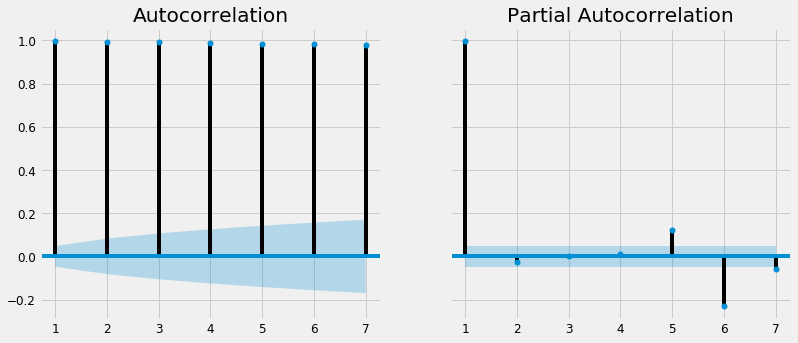

In [982]:
autocorr_plots(y, lags=8)

### Split train and test

- For splitting a time-series data is not an easy task but in this case Bitcoin price has a cyclic trend and high in year 2018.
- The test set should be the most recent part of data. 
- Also, one need to simulate a situation in the production environment, where after training a model you evaluate data coming after the time of creation of the model. 

    - The Time-series data's start date is : 2018-11-18
    - The Time-series data's end date is   : 2014-04-01 

So, I will be splitting my Train and Test series data as followed :
 
    - TRAIN : Data Prior 31/12/2018 (45 months) 
    - TEST :  Data After 01/01/2018 ( approx 11 months)

*Another approach is to split as Train/Validation/Test, which I will try later.*

In [731]:
bitcoin_df.head()

,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2018-11-18,5558.554483,2.106389e+06,378.945507,2018,11,18,4,2018Q4
2018-11-17,5493.911578,2.446166e+06,445.250283,2018,11,17,4,2018Q4
2018-11-16,5556.090945,3.652887e+06,657.456297,2018,11,16,4,2018Q4
2018-11-15,5607.531189,6.854693e+06,1222.408391,2018,11,15,4,2018Q4
2018-11-14,5665.002240,6.870521e+06,1212.801094,2018,11,14,4,2018Q4


In [986]:
# Make a copy for modelling.
bitcoin_model = bitcoin_df.copy()
bitcoin_model.shape

(1693, 8)

In [987]:
bitcoin_model.head()

,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2018-11-18,5558.554483,2.106389e+06,378.945507,2018,11,18,4,2018Q4
2018-11-17,5493.911578,2.446166e+06,445.250283,2018,11,17,4,2018Q4
2018-11-16,5556.090945,3.652887e+06,657.456297,2018,11,16,4,2018Q4
2018-11-15,5607.531189,6.854693e+06,1222.408391,2018,11,15,4,2018Q4
2018-11-14,5665.002240,6.870521e+06,1212.801094,2018,11,14,4,2018Q4


In [989]:
test_df = bitcoin_model[bitcoin_model['Year'] == 2018]
print(test_df.shape)
test_df.head()

(322, 8)


,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2018-11-18,5558.554483,2.106389e+06,378.945507,2018,11,18,4,2018Q4
2018-11-17,5493.911578,2.446166e+06,445.250283,2018,11,17,4,2018Q4
2018-11-16,5556.090945,3.652887e+06,657.456297,2018,11,16,4,2018Q4
2018-11-15,5607.531189,6.854693e+06,1222.408391,2018,11,15,4,2018Q4
2018-11-14,5665.002240,6.870521e+06,1212.801094,2018,11,14,4,2018Q4


In [993]:
train_df = bitcoin_model[bitcoin_model['Year'] < 2018]
print(train_df.shape)
train.head()

(1371, 8)


,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2017-12-31,14612.799982,3.491536e+07,2389.368186,2017,12,31,4,2017Q4
2017-12-30,13506.995353,4.671744e+07,3458.758692,2017,12,30,4,2017Q4
2017-12-29,15393.893101,3.721477e+07,2417.501935,2017,12,29,4,2017Q4
2017-12-28,15380.880643,5.525249e+07,3592.283834,2017,12,28,4,2017Q4
2017-12-27,16857.214374,4.594128e+07,2725.318456,2017,12,27,4,2017Q4


### 4. Time-Series Modelling ::

### Different Models are :
       1. AR ---> Auto regressive models (based on the past values)
       2. MA ---> Moving average (based on the past error)
       3. ARMA ---> combo of 1 & 2
       4. Other variants like ARIMA, SARIMA (plus Seasonal)

### Linear Regression

In [995]:
# 1. subselect this increasing section
train_df = train[['Close']]
a_rolling_mean = train_df.rolling(window=63, center=True).mean()
a_rolling_mean.dropna(inplace=True)
print(len(a_rolling_mean))

1309


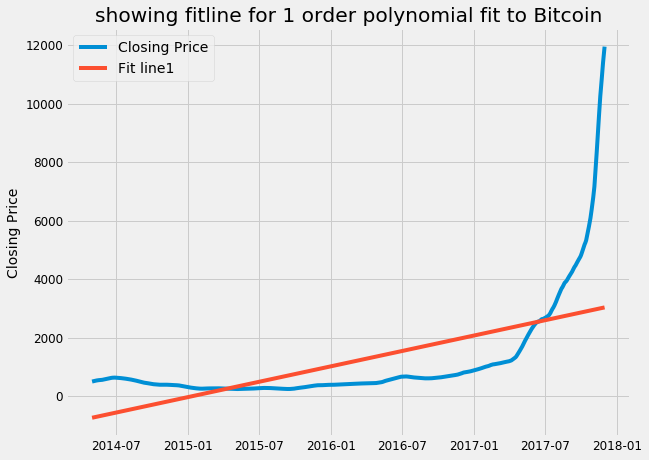

Fitline parameters:
 
-2.883 x + 3031
----------------------------


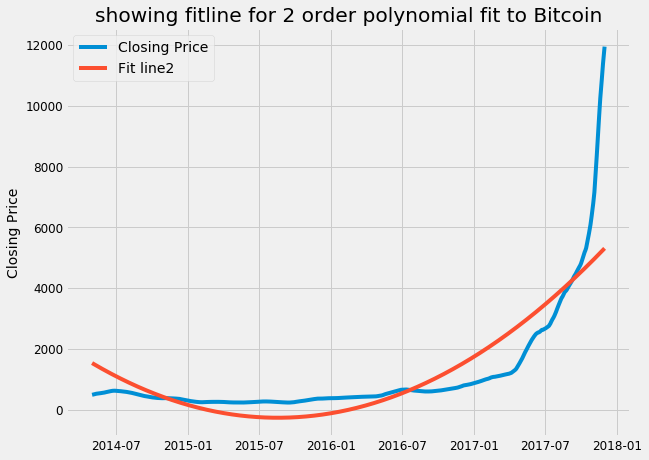

Fitline parameters:
          2
0.008005 x - 13.35 x + 5312
----------------------------


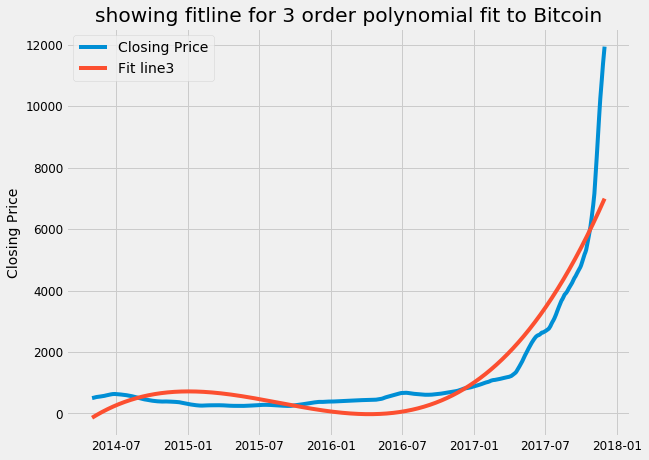

Fitline parameters:
            3           2
-1.507e-05 x + 0.03758 x - 28.82 x + 6995
----------------------------


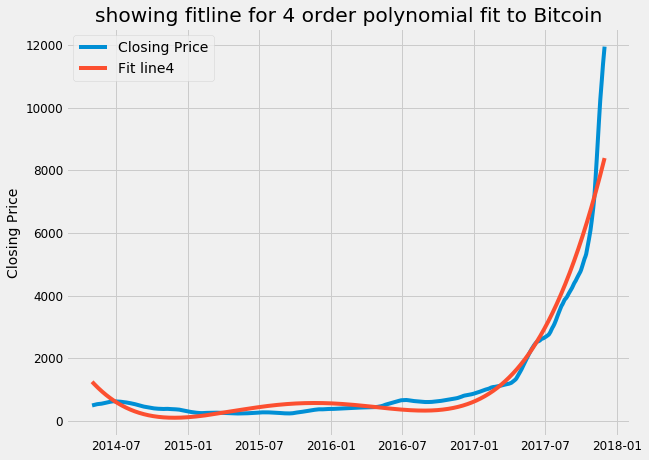

Fitline parameters:
           4             3          2
3.351e-08 x - 0.0001027 x + 0.1113 x - 50.22 x + 8390
----------------------------


In [996]:
colname = 'Close'
label_str = 'Closing Price'
    
for i in range(1, 5):
    
    #2. fit i dimensional linear regression to this data
    a_line_coef = np.polyfit(range(0, len(a_rolling_mean)), a_rolling_mean[colname],i)
    a_polynomial = np.poly1d(a_line_coef)
    
    #3. plot the linear regression along with the data\

    plt.figure(figsize=(9,7))
    plt.plot(a_rolling_mean.index, a_rolling_mean[colname], label=label_str)
    plt.plot(a_rolling_mean.index, a_polynomial(range(0, len(a_rolling_mean))), label="Fit line" + str(i))

    plt.ylabel(label_str)
    plt.title("showing fitline for " + str(i) + " order polynomial fit to Bitcoin")
    plt.legend(loc='best')
    plt.show()


    #4. view fitted functions
    print("Fitline parameters:")
    print(a_polynomial)
    print("----------------------------")

### Time series forecasting with ARIMA

In [1051]:
pd.DatetimeIndex(bitcoin_model.index)
bitcoin_model.index

DatetimeIndex(['2018-11-18', '2018-11-17', '2018-11-16', '2018-11-15',
               '2018-11-14', '2018-11-13', '2018-11-12', '2018-11-11',
               '2018-11-10', '2018-11-09',
               ...
               '2014-04-10', '2014-04-09', '2014-04-08', '2014-04-07',
               '2014-04-06', '2014-04-05', '2014-04-04', '2014-04-03',
               '2014-04-02', '2014-04-01'],
              dtype='datetime64[ns]', name='Date', length=1693, freq=None)

In [1052]:
# start setting up train and test sets
y = bitcoin_model['Close'].resample('MS').mean()

test_values = test_df['Close'].resample('MS').mean()
test_dates = test_df.index

train_values = train_df['Close'].resample('MS').mean()
train_dates = train_df.index

In [1053]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [1054]:
test_df['Close'].dropna(inplace=True)

In [1055]:
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit()
            aic_list.append(results.aic)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('except')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1086.816006750069
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:838.0905995315802
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:843.4664440023708
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1344.8850989858106
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:858.9166518784606
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:827.6974469164165
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:637.5013701638952
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1248.055870352412
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1030.3291026106592
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:781.9187055566425
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:782.8115199407604
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2532.5282754726254
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:840.1759755842892
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:777.3594110386205
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:607.1143340893491
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2528.495202588251
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:938.9569514475193
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:741.3906205795063
ARIMA(0

In [1056]:
# find the min AIC
np.min(aic_list)

543.3036570416019

### Fitting the ARIMA model

In [1057]:
# ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-265.7837631223489
model = sm.tsa.statespace.SARIMAX(y,
                                  order=(1, 1, 1),
                                  seasonal_order=(0, 0, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5820      0.409     -1.423      0.155      -1.384       0.220
ma.L1          0.7944      0.360      2.206      0.027       0.089       1.500
ma.S.L12      -0.1360      1.499     -0.091      0.928      -3.075       2.803
sigma2      2.049e+06   1.91e+05     10.748      0.000    1.68e+06    2.42e+06


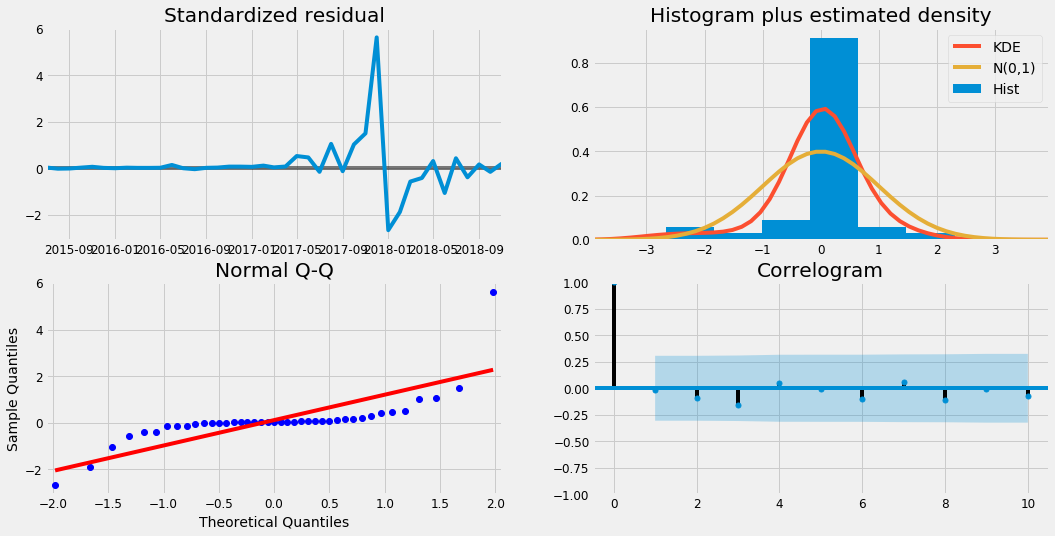

In [1058]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating forecasts

In [1059]:
start_test = test_df.index[len(test)-1]
start_test

Timestamp('2018-01-01 00:00:00')

In [1060]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
# prediction confident interval
pred_ci.head(2)

,lower Close,upper Close
Date,,
2018-01-01,14953.983991,20564.921612
2018-02-01,9368.374212,14979.306369


In [1061]:
pred_ci.tail(2)

,lower Close,upper Close
Date,,
2018-10-01,3853.175116,9464.091202
2018-11-01,3086.233494,8697.149087


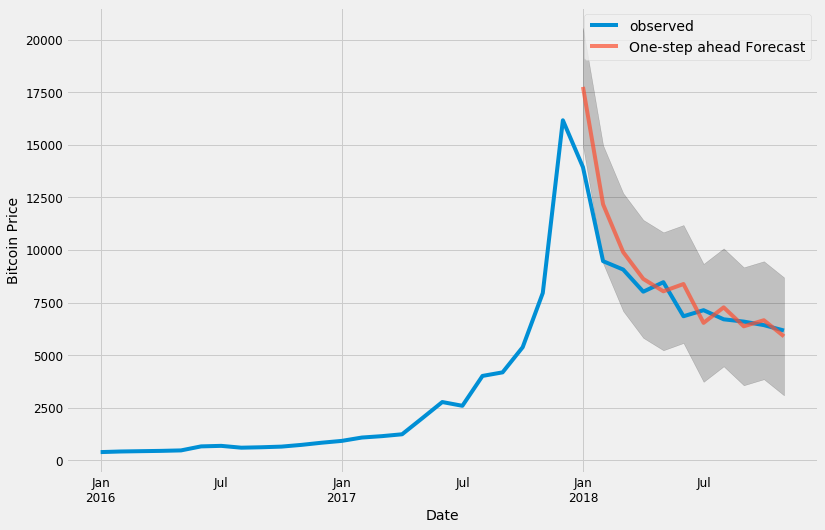

In [1065]:
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(12, 8))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')
plt.legend()

plt.show()

### OBSERVATIONS :

- The line plot is showing the observed values compared to the rolling forecast predictions. 
- As our test data is the complete year 2018, the forecast trend and the observed trend are not aligning a lot but their trend which is the peaks and drops are very similar. Hence, the magnitudes of both are different.
- The forecast also shows an upward trend and captures the cyclic nature towards the end of the year i.e. variability with time but at randome intervals.

In [1066]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-12-31':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2398334.83


In [1067]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1548.66


### Producing and visualizing forecasts

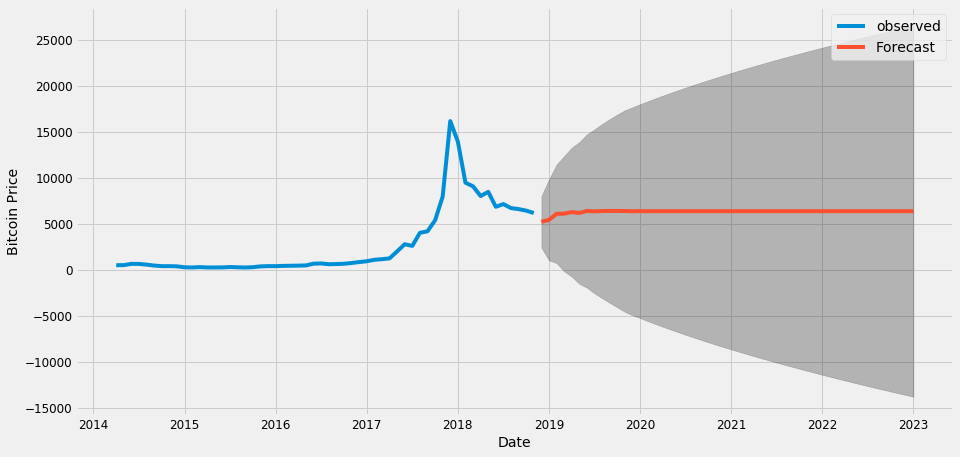

In [1068]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')

plt.legend()
plt.show()

### OBSERVATIONS ::
- The forecast for one-step works better than for 4-years as we see the forecast follows the past year zero trend and hence the forecast cant be used as a guidance even though Bitcoin is a volatile digital cuurency but dropping so low can't be right.
- Also,  as we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which become constant into the future.

### ARMA : Autoregressive–moving-average Model 

In [1069]:
## AR Model, good for short term analysis
arma = ARMA(train_values, (1,0)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   45
Model:                     ARMA(1, 0)   Log Likelihood                -389.426
Method:                       css-mle   S.D. of innovations           1336.578
Date:                Fri, 23 Nov 2018   AIC                            784.852
Time:                        01:33:39   BIC                            790.272
Sample:                    04-01-2014   HQIC                           786.873
                         - 12-01-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6475.6539   6339.985      1.021      0.313   -5950.489    1.89e+04
ar.L1.Close     0.9821      0.022     44.453      0.000       0.939       1.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0182           +0.0000j            1.0182            0.0000
-----------------------------------------------------------------------------
"""

In [1070]:
r2_score(train_values, arma.predict())

0.6480052511310919

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(train_dates, train_values, lw=2, color='grey', ls='dashed')
ax.plot(train_dates, arma.fittedvalues, lw=2, color='darkred')
plt.show()

### SARIMA -- Seasonal Auto Regressive Integrated Moving Average

In [1072]:
import statsmodels.api as sm

data = train_df.Close.values
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,1), seasonal_order=(0,1,1,4))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1371
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -9357.400
Date:                           Fri, 23 Nov 2018   AIC                          18720.800
Time:                                   01:34:19   BIC                          18736.459
Sample:                                        0   HQIC                         18726.661
                                          - 1371                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0994      0.005     19.437      0.000       0.089       0.109
ma.S.L4       -0.9995      0.277     -3.610

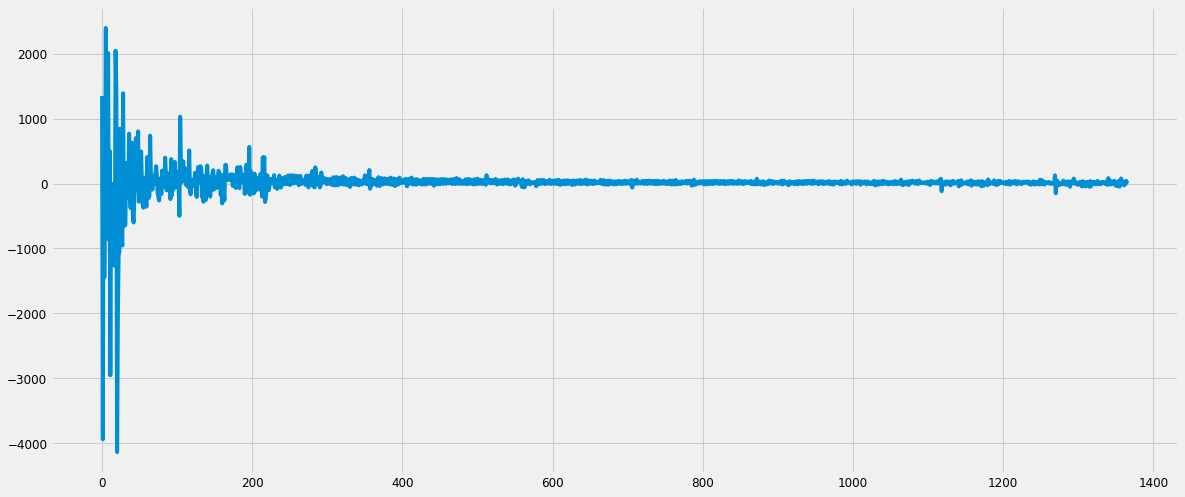

In [1073]:
# Don't plot the first 5 values, to account for data loss when differencing (d=1 + D=5)
residuals = results.resid[5:]
plt.plot(residuals)

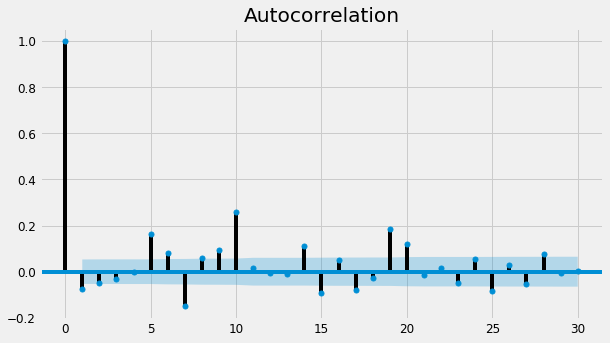

In [1074]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(residuals, lags=30, ax=ax)
plt.show()

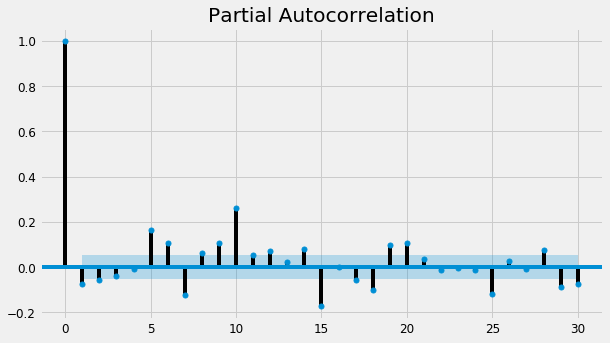

In [1075]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(residuals, lags=30, ax=ax)
plt.show()

**Increase the order of the SARIMAX model.**

How do the results change?

In [1076]:
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,2), seasonal_order=(0,1,1,4))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1371
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 4)   Log Likelihood               -9345.173
Date:                           Fri, 23 Nov 2018   AIC                          18698.346
Time:                                   01:34:33   BIC                          18719.224
Sample:                                        0   HQIC                         18706.160
                                          - 1371                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1176      0.006     19.906      0.000       0.106       0.129
ma.L2         -0.1605      0.006    -28.540

### Forecast using the SARIMAX model

Statsmodels result objects from SARIMAX have a `.forecast` function that can use the state space model to predict out to future timepoints.

Forecast 12 additional timepoints and plot them.

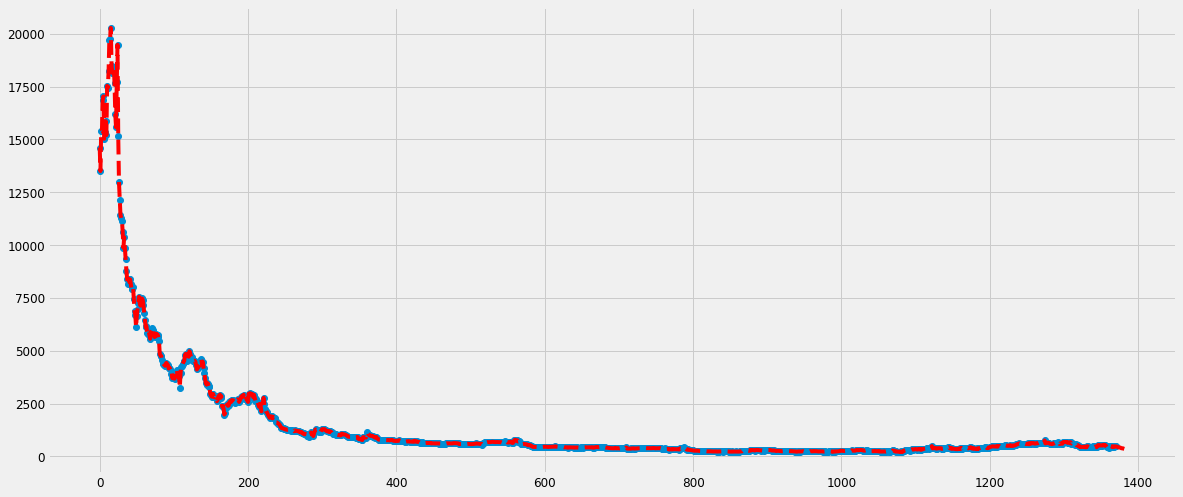

In [1077]:
# forecasting
res = model.fit()
preds = res.forecast(12)
fcast = np.concatenate((data, preds), axis=0)

plt.figure();
plt.plot(data, 'o' , fcast, 'r--');

In [836]:
fitted_values_sarima=sarimax.SARIMAX(diff0.values,order=(1,0,0)).fit()

In [1078]:
r2_score(diff0, fitted_values_sarima.predict()) # ( y and yhat)

0.5298717568575232

### Forecast using the SARIMAX model

### ARIMA -- Auto Regressive Integrated Moving Average.

In [1079]:
import pyflux as pf 

fitted_values_arima=pf.ARIMA(diff0.values, ar=1,ma=1).fit()

In [1080]:
fitted_values_arima.summary()

Normal ARIMA(1,0,1)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: -12420.0347                       
End Date: 1688                                          AIC: 24848.0694                                   
Number of observations: 1688                            BIC: 24869.7946                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -12.0363   10.1984    -1.1802  0.2379   (-32.0252 | 7.9527)      
AR(1)                                

In [ ]:
r2_score(diff0, fitted_values_arima.scores) # ( y and yhat)

### Applying ARIMA

In [1082]:
bitcoin_df.head()

,Close,Market_Cap,Volume,Year,Month,Day,Quater,QTR
Date,,,,,,,,
2018-11-18,5558.554483,2.106389e+06,378.945507,2018,11,18,4,2018Q4
2018-11-17,5493.911578,2.446166e+06,445.250283,2018,11,17,4,2018Q4
2018-11-16,5556.090945,3.652887e+06,657.456297,2018,11,16,4,2018Q4
2018-11-15,5607.531189,6.854693e+06,1222.408391,2018,11,15,4,2018Q4
2018-11-14,5665.002240,6.870521e+06,1212.801094,2018,11,14,4,2018Q4


In [1083]:
bitcoin_df.columns

Index(['Close', 'Market_Cap', 'Volume', 'Year', 'Month', 'Day', 'Quater',
       'QTR'],
      dtype='object')

In [1084]:
bitcoin_df.index

DatetimeIndex(['2018-11-18', '2018-11-17', '2018-11-16', '2018-11-15',
               '2018-11-14', '2018-11-13', '2018-11-12', '2018-11-11',
               '2018-11-10', '2018-11-09',
               ...
               '2014-04-10', '2014-04-09', '2014-04-08', '2014-04-07',
               '2014-04-06', '2014-04-05', '2014-04-04', '2014-04-03',
               '2014-04-02', '2014-04-01'],
              dtype='datetime64[ns]', name='Date', length=1693, freq=None)

In [1085]:
bitcoin_df.index.dtype

dtype('<M8[ns]')

#### 2. Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

In [1086]:
 roll_mean=price_rate.rolling(window=window_type).mean()

NameError: name 'price_rate' is not defined

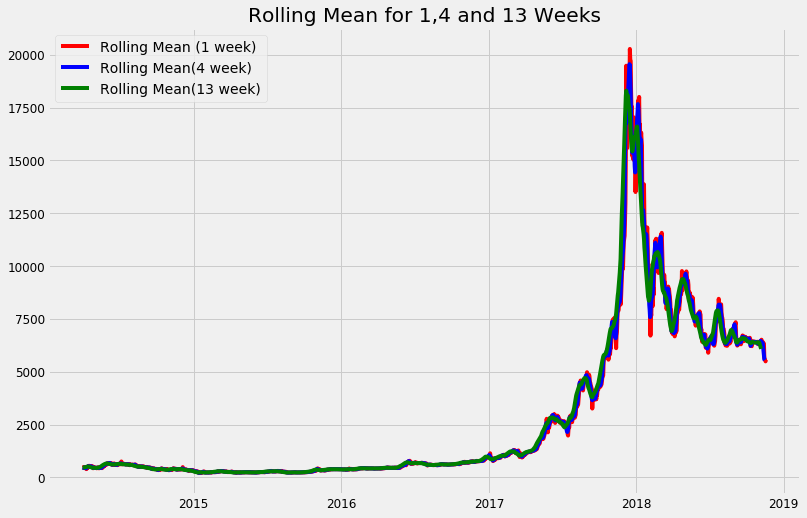

In [1087]:
rate=bitcoin_df.Close
rolmean1 = rate.rolling( window = 1).mean()
rolmean4 = rate.rolling( window = 4).mean()
rolmean13 = rate.rolling( window = 13).mean()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
mean = plt.plot(rolmean1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(rolmean4, color='blue', label='Rolling Mean(4 week)')
mean = plt.plot(rolmean13, color='green', label='Rolling Mean(13 week)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1,4 and 13 Weeks')
plt.show()

In [1088]:
print('1 Week Lag AutoCorr', bitcoin_df['Close'].autocorr(lag=1))
print('2 Week Lag AutoCorr', bitcoin_df['Close'].autocorr(lag=2))
print('52 Week Lag AutoCorr', bitcoin_df['Close'].autocorr(lag=52))


1 Week Lag AutoCorr 0.9973415187155797
2 Week Lag AutoCorr 0.9945705006061639
52 Week Lag AutoCorr 0.8299270060042685


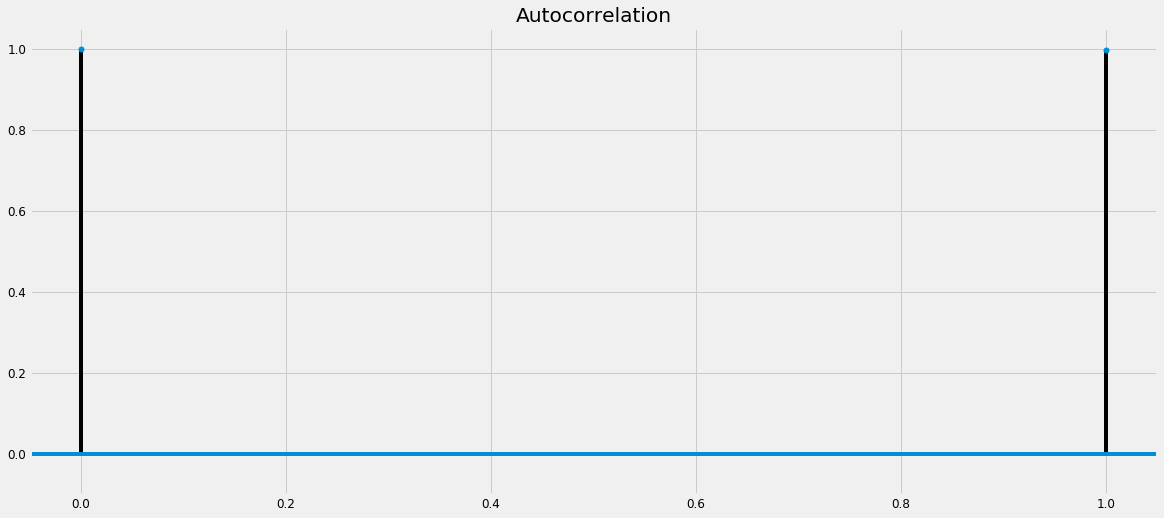

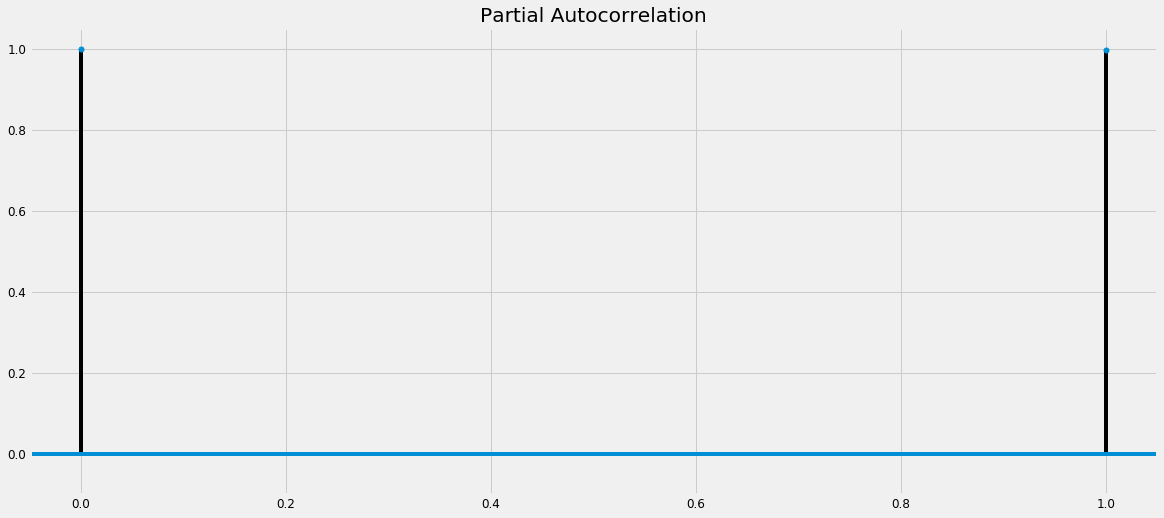

In [1089]:
# 1 Month Autocorr and Partial Autocorr
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(bitcoin_df.Close, lags = 1)
plot_pacf(bitcoin_df.Close, lags = 1)

# If you do not use plt.show() it will plot the same vize twice.
# This may be a bug you can fix and submit, to contribute to open source!
plt.show()

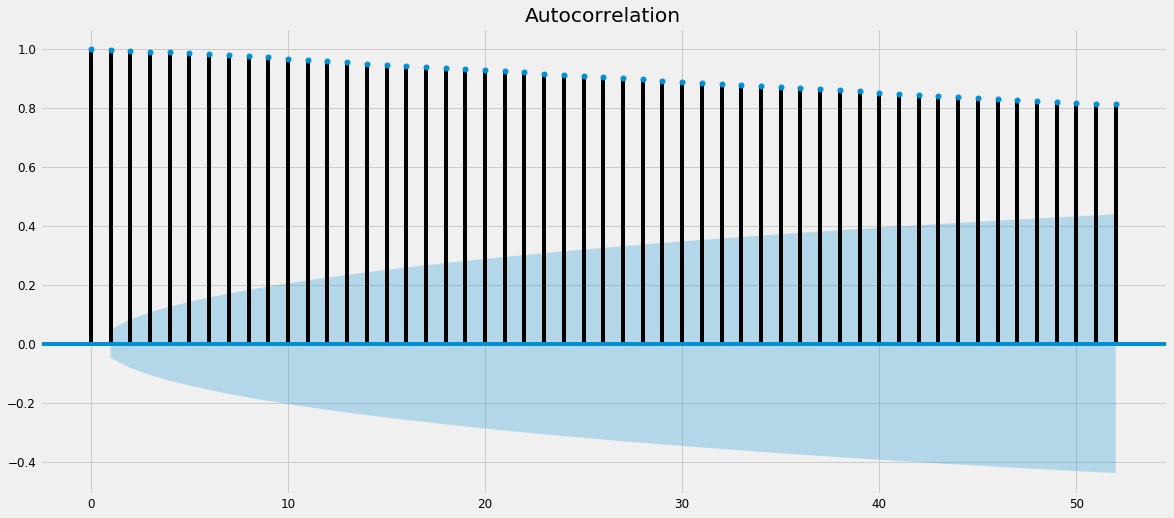

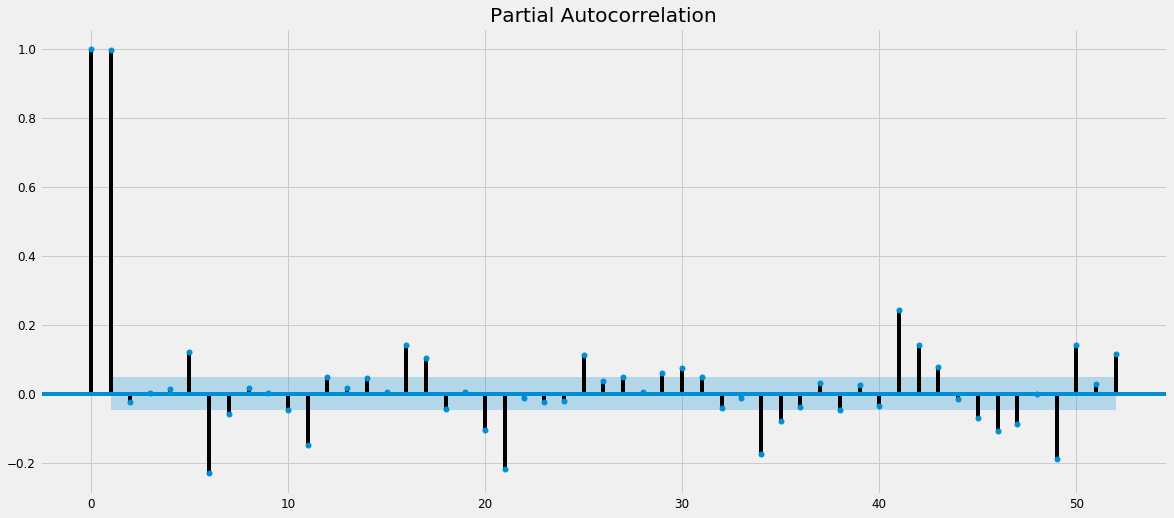

In [1090]:
# 52 weeks Autocorr and Partial Autocorr

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(bitcoin_df.Close, lags =52)
plot_pacf(bitcoin_df.Close, lags =52)


plt.show()

In [1091]:
from statsmodels.tsa.arima_model import AR

train_values = bitcoin_df.values
train_dates = train.index


AR1 = AR(train_values, train_dates).fit()

ValueError: Only the univariate case is implemented